# Data Sampling
####1. Selected metropolitan area: **New Jersey(NJ)**

####2. Construct a dataset exclusively for the chosen area: ✅
* nj_business.json
* nj_reviews.json



In [ ]:
from google.colab import drive
import pandas as pd
import gc  # Manual garbage collection

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Set file paths
business_file_path = '/content/drive/MyDrive/yelp_academic_dataset_business.json'
review_file_path = '/content/drive/MyDrive/yelp_academic_dataset_review.json'

# 3. Set chunk size
chunksize = 10000  # Read 10,000 rows at a time

# 4. Read and filter businesses from New Jersey (NJ)
nj_business = pd.concat(
    [chunk[chunk['state'] == 'NJ'] for chunk in pd.read_json(business_file_path, lines=True, chunksize=chunksize)],
    ignore_index=True
)

# 5. Print the number of businesses in NJ
print(f"Number of businesses in New Jersey: {len(nj_business)}")

# 6. Get a list of business IDs for NJ businesses
nj_business_ids = set(nj_business['business_id'])

# 7. Read and filter reviews for NJ businesses
nj_reviews = pd.concat(
    [chunk[chunk['business_id'].isin(nj_business_ids)] for chunk in pd.read_json(review_file_path, lines=True, chunksize=chunksize)],
    ignore_index=True
)

# 8. Print statistics
print(f"Number of reviews related to New Jersey businesses: {len(nj_reviews)}")

# 9. Save the filtered data
with open('/content/drive/MyDrive/nj_business.json', 'w') as f:
    f.write(nj_business.to_json(orient='records', lines=False))

with open('/content/drive/MyDrive/nj_reviews.json', 'w') as f:
    f.write(nj_reviews.to_json(orient='records', lines=False))

# Run garbage collection to free memory
gc.collect()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of businesses in New Jersey: 8536
Number of reviews related to New Jersey businesses: 260897


273218

# Data Sampling
####3. Basic statistics:
#####***Business***
* Number of businesses
* Top 10 business categories
* Business rating statistics(count, mean, std, min, max)
* Business review count statistics(count, mean, std, min, max)
* Distribution of business ratings

#####***Reviews***
* Number of reviews
* Distribution of review by star ratings
* Average review length
* Review distribution by year
* Top 10 users with the most interactions

In [ ]:
from google.colab import drive
import pandas as pd

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Load the datasets from Google Drive
business_file_path = '/content/drive/MyDrive/nj_business.json'

# Load business data (orient set to 'records')
nj_business = pd.read_json(business_file_path, orient='records')

# Drop any rows with missing values for 'latitude' and 'longitude'
latitudes = nj_business['latitude'].dropna()
longitudes = nj_business['longitude'].dropna()

# Find the minimum and maximum values for latitude and longitude
min_latitude = latitudes.min()
max_latitude = latitudes.max()
min_longitude = longitudes.min()
max_longitude = longitudes.max()

# Output the range of latitude and longitude
print(f"Latitude Range: {min_latitude} to {max_latitude}")
print(f"Longitude Range: {min_longitude} to {max_longitude}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Latitude Range: 39.0532921 to 40.389153
Longitude Range: -75.550528 to -74.6585723


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Datasets loaded successfully!
Total number of businesses: 8536

Top 10 business categories:
categories
Restaurants                  3341
Food                         1717
Shopping                     1228
Beauty & Spas                 819
Home Services                 741
Pizza                         717
Automotive                    682
Sandwiches                    602
Health & Medical              595
Event Planning & Services     570
Name: count, dtype: int64

Business rating statistics:
count    8536.000000
mean        3.459114
std         0.960938
min         1.000000
25%         3.000000
50%         3.500000
75%         4.000000
max         5.000000
Name: stars, dtype: float64

Review count statistics per business:
count    8536.000000
mean       29.268627
std        49.686376
min         5.000000
25%         7.000000
50%        13.000000
75%        2

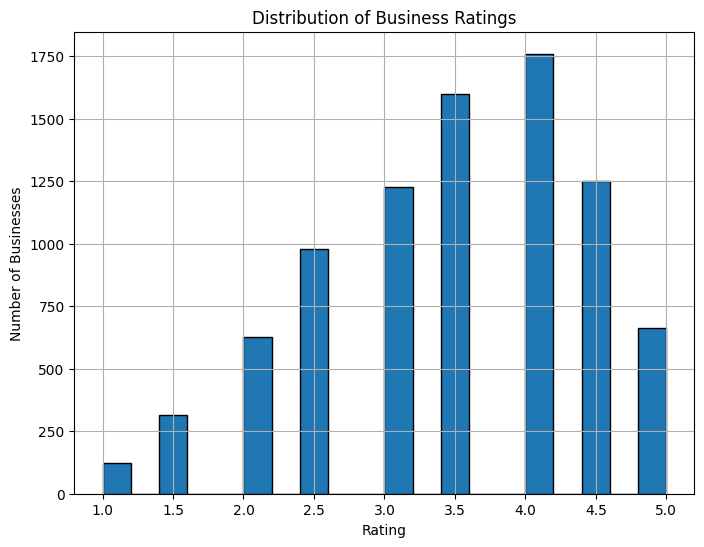


Total number of reviews: 260897

Review distribution by star ratings:
stars
1     51506
2     22838
3     25853
4     50209
5    110491
Name: count, dtype: int64


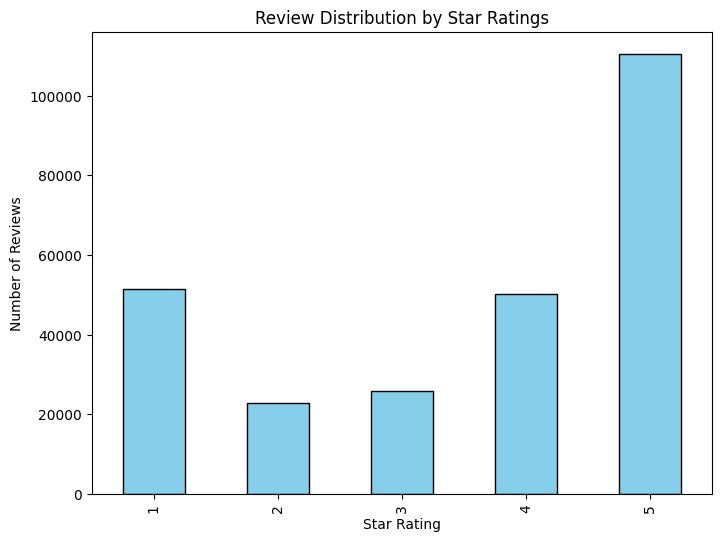


Average review length: 570.44 characters

Review distribution by year:
year
2005        3
2006      101
2007      384
2008      988
2009     2045
2010     4076
2011     7047
2012     9865
2013    14410
2014    19752
2015    26961
2016    29271
2017    31698
2018    33873
2019    33889
2020    21988
2021    23416
2022     1130
Name: count, dtype: int64


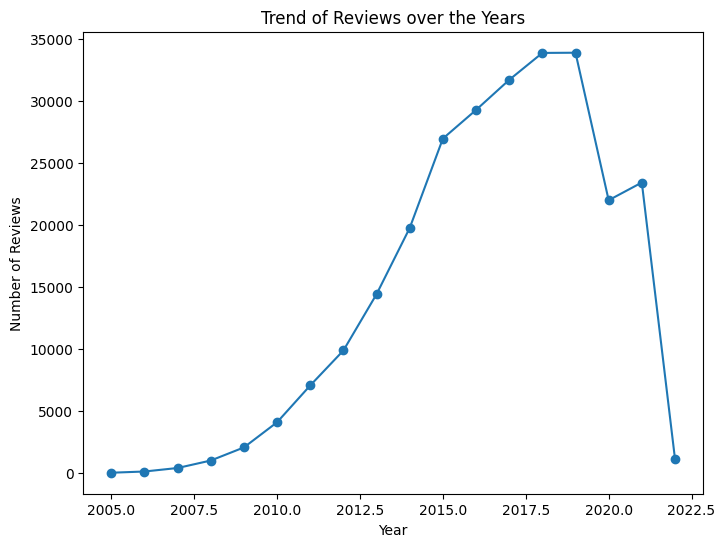

The map has been saved as an HTML file and can be viewed in Google Drive.

Top 10 users with the most interactions:
                      user_id  total_votes
427    -G7Zkl1wIWBBmD0KRy_sCw        15360
60813  aaEr2-3Qaa4jo9rkjiqibA         5341
46859  SeWsQoYPbQuMAqfRNNS6Jg         5210
24410  ET8n-r7glWYqZhuR6GcdNw         4880
77594  lRRuTimITgwzoXLIM3g9qw         3959
99626  zUk_Ww2q1At1QSyRbUjIGQ         3887
38188  N8ITUUDRBpo1hTNDvk1byA         3733
40365  OXlfFHsM15JYh_lvat2w2w         3488
27867  GcdYgbaF75vj7RO6EZhPOQ         2844
94195  w6OPX0bAyxIFKWkGDJrtGA         2554


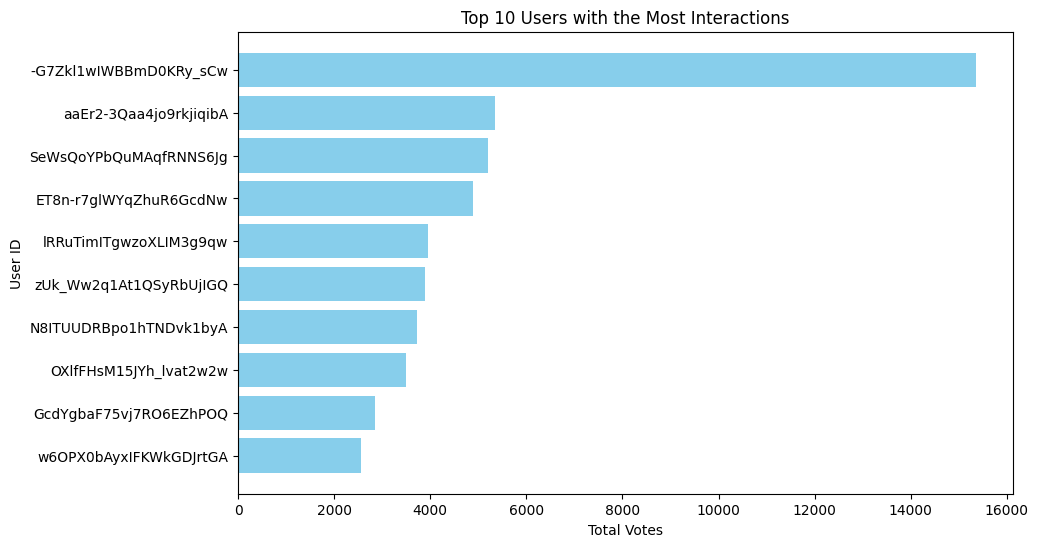

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# Mount Google Drive
drive.mount('/content/drive')

# 1. Load the datasets from Google Drive
business_file_path = '/content/drive/MyDrive/nj_business.json'
review_file_path = '/content/drive/MyDrive/nj_reviews.json'

# Load business and review data
nj_business = pd.read_json(business_file_path, orient='records')
nj_reviews = pd.read_json(review_file_path, orient='records')

print("Datasets loaded successfully!")

### 2. Business Data Analysis

print(f"Total number of businesses: {len(nj_business)}")

# Category distribution (split the 'categories' field)
category_counts = nj_business['categories'].str.split(', ').explode().value_counts()
print("\nTop 10 business categories:")
print(category_counts.head(10))

# Basic statistics for business ratings
rating_stats = nj_business['stars'].describe()
print("\nBusiness rating statistics:")
print(rating_stats)

# Distribution of the number of reviews per business
review_count_stats = nj_business['review_count'].describe()
print("\nReview count statistics per business:")
print(review_count_stats)

# Histogram of business ratings
plt.figure(figsize=(8, 6))
nj_business['stars'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Business Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Businesses')
plt.show()

### 3. Review Data Analysis

print(f"\nTotal number of reviews: {len(nj_reviews)}")

# Distribution of reviews by star ratings
star_distribution = nj_reviews['stars'].value_counts().sort_index()
print("\nReview distribution by star ratings:")
print(star_distribution)

# Bar chart of star rating distribution
plt.figure(figsize=(8, 6))
star_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Review Distribution by Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.show()

# Calculate the average length of reviews
nj_reviews['text_length'] = nj_reviews['text'].str.len()
average_review_length = nj_reviews['text_length'].mean()
print(f"\nAverage review length: {average_review_length:.2f} characters")

# Review distribution over time (by year)
nj_reviews['year'] = pd.to_datetime(nj_reviews['date']).dt.year
review_year_distribution = nj_reviews['year'].value_counts().sort_index()
print("\nReview distribution by year:")
print(review_year_distribution)

# Line chart of reviews over the years
plt.figure(figsize=(8, 6))
review_year_distribution.plot(kind='line', marker='o')
plt.title('Trend of Reviews over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

### 4. Heatmap of Business Locations

# Filter businesses with valid latitude and longitude
business_location = nj_business[['latitude', 'longitude']].dropna()

# Create a map centered on the average coordinates of New Jersey businesses
map_center = [business_location['latitude'].mean(), business_location['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Add a heatmap layer
heat_data = business_location.values.tolist()
HeatMap(heat_data).add_to(m)

# Display the heatmap
display(m)
m.save('/content/drive/MyDrive/nj_business_heatmap.html')
print("The map has been saved as an HTML file and can be viewed in Google Drive.")

### 5. Review Interaction Analysis (Top 10 Users)

# Calculate the total votes (useful + funny + cool) for each review
nj_reviews['total_votes'] = nj_reviews[['useful', 'funny', 'cool']].sum(axis=1)

# Aggregate total votes per user
user_votes = nj_reviews.groupby('user_id')['total_votes'].sum().reset_index()

# Sort users by total votes in descending order and select the top 10
top_10_users = user_votes.sort_values(by='total_votes', ascending=False).head(10)

# Print the top 10 users with the most interactions
print("\nTop 10 users with the most interactions:")
print(top_10_users)

# Bar chart of the top 10 users by total votes
plt.figure(figsize=(10, 6))
plt.barh(top_10_users['user_id'], top_10_users['total_votes'], color='skyblue')
plt.xlabel('Total Votes')
plt.ylabel('User ID')
plt.title('Top 10 Users with the Most Interactions')
plt.gca().invert_yaxis()  # Invert the y-axis to show the top user at the top
plt.show()

#Tokenization and Stemming
####1. Randomly select two business IDs
####2. Tokenization and Stemming
####3. Visualization
a) Word Frequency Analysis (Bar Charts, Word Cloud)
* Compare word frequencies before and after stemming.

b) N-gram Analysis	(Dual Bar Charts)
* Show frequency changes in Bigram combinations before and after stemming.

c) Comment Length Analysis	(Density Plot)
* Display the distribution trend of comment lengths before and after stemming.

d) Sentiment Analysis	(Scatter Plot, Box Plot, Grouped Bar Chart)
* Compare changes in sentiment tendencies and scores before and after stemming.

e) Word Embedding Analysis	(PCA/t-SNE Scatter Plot)
* Visualize changes in word embedding structures before and after stemming.

f) Frequency Change Summary	(Overlapping Bar Chart, Heatmap)
* Identify words with the most significant frequency changes after stemming.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Datasets loaded successfully!
Selected Business IDs: ['9X2rQUHO_ka0k7tu7wr_7g', 'O2l31-gVCX2R9yRTtGPyaQ']


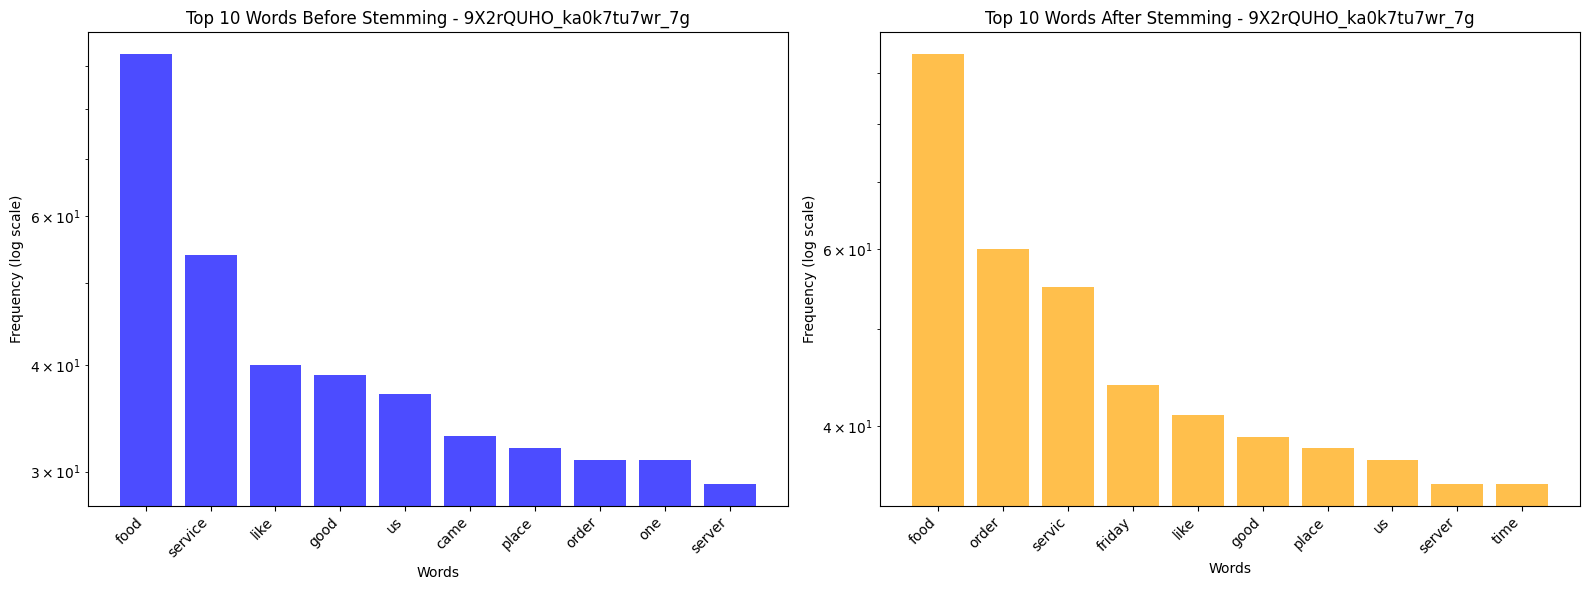

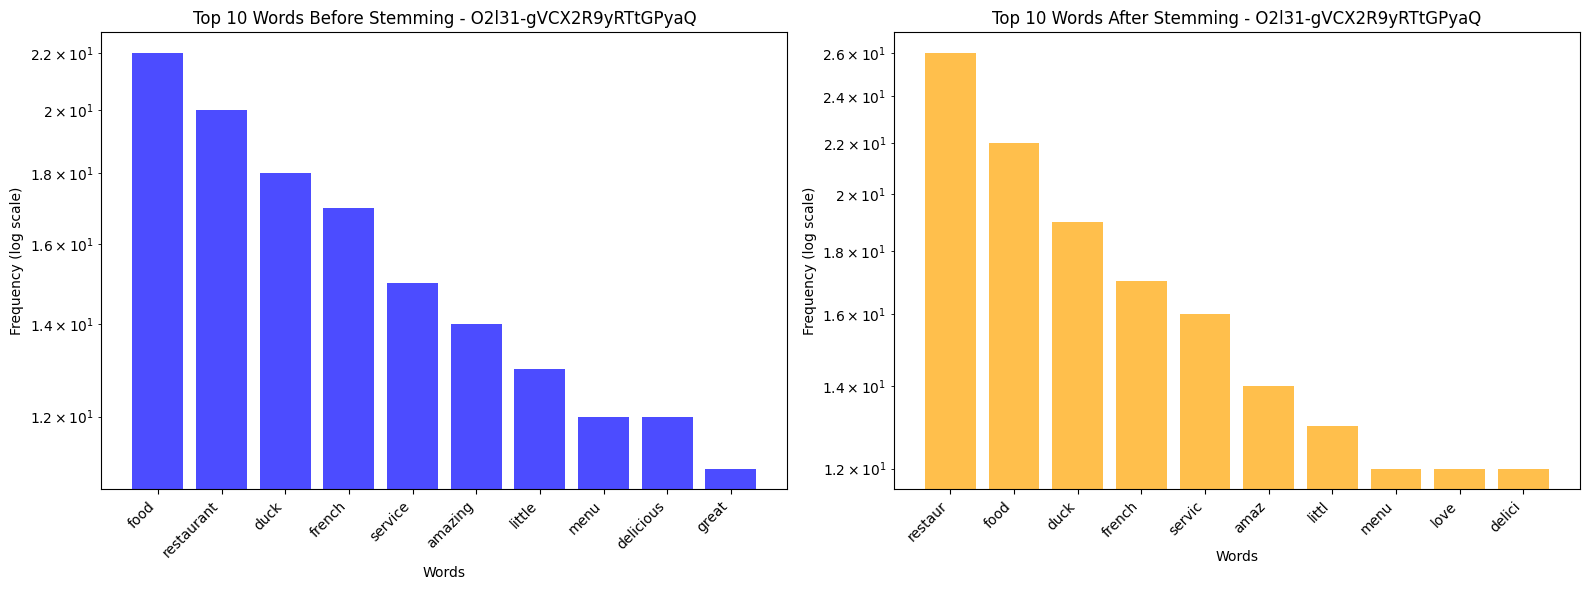

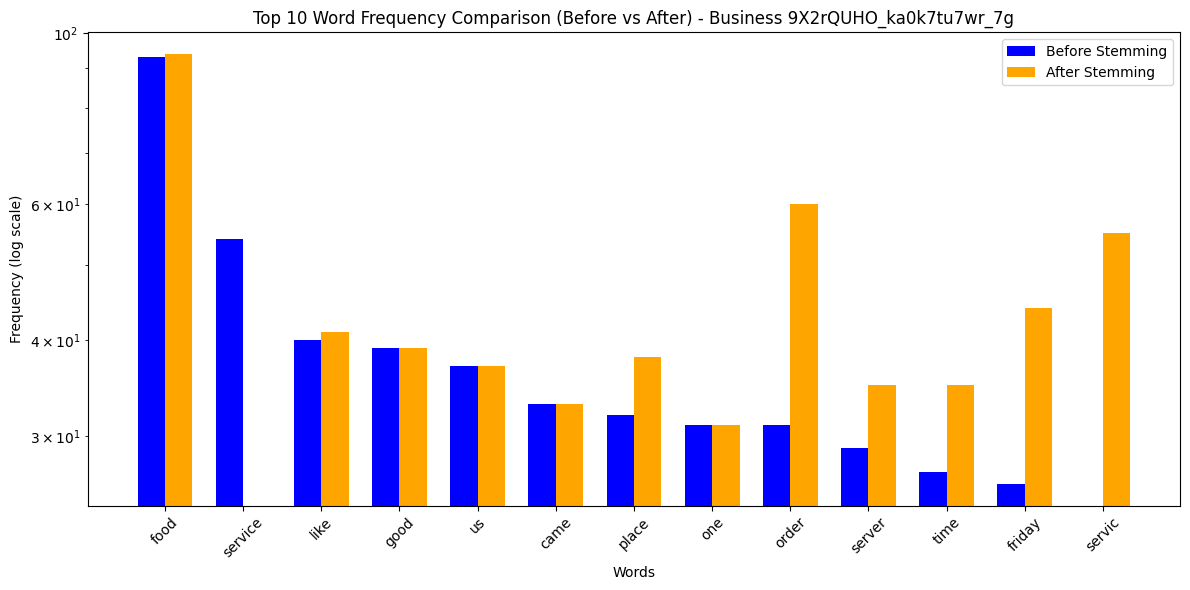

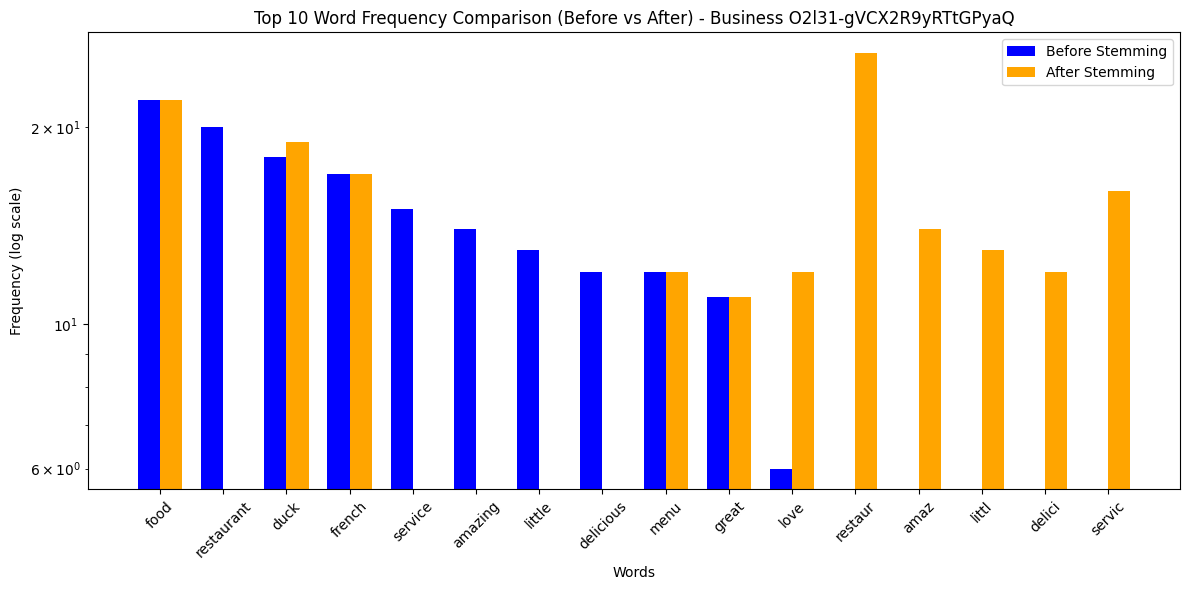

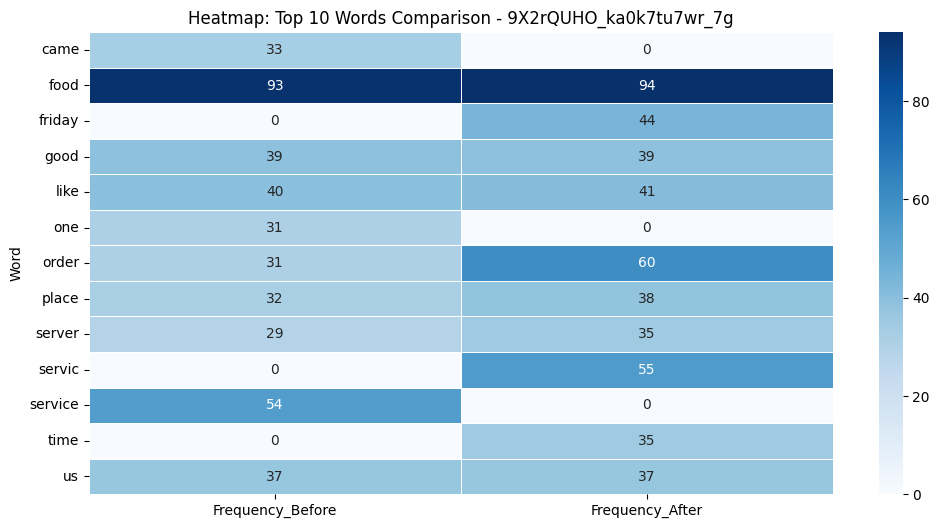

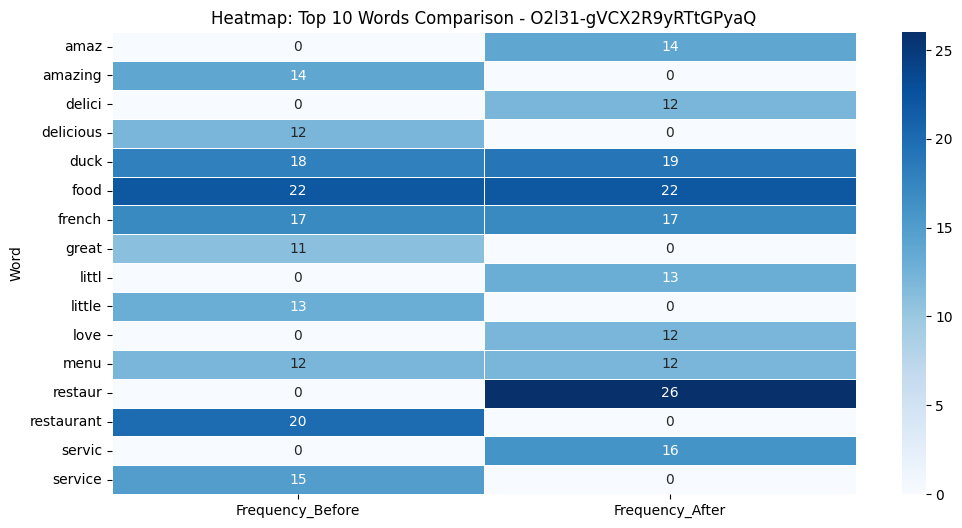

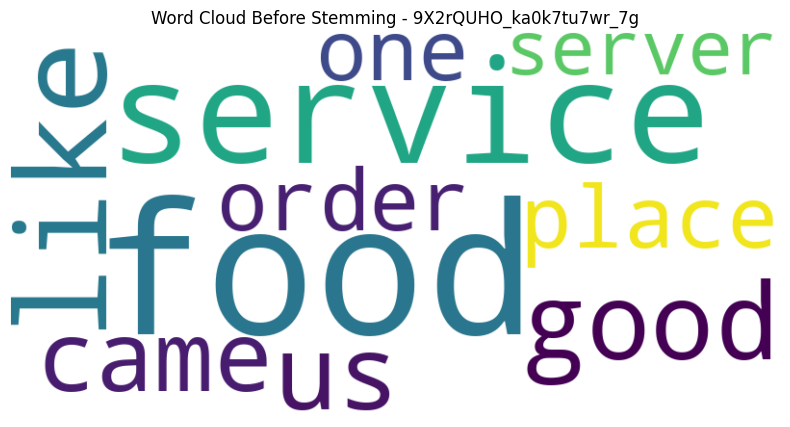

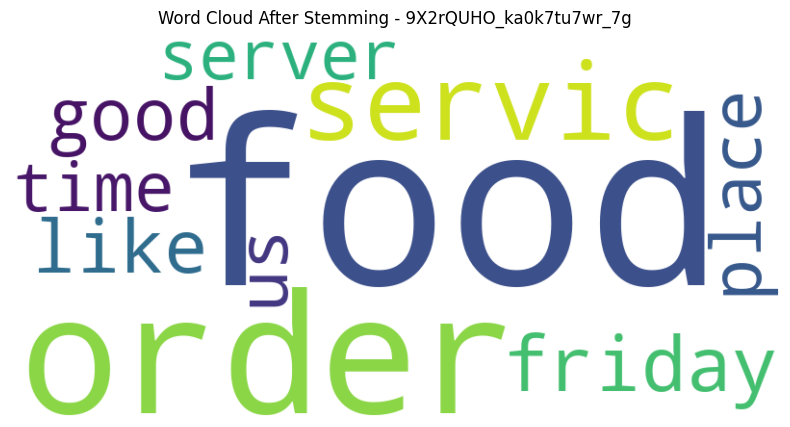

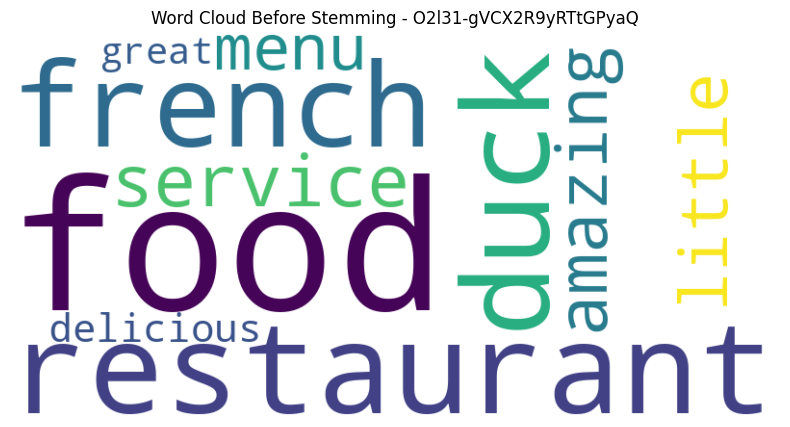

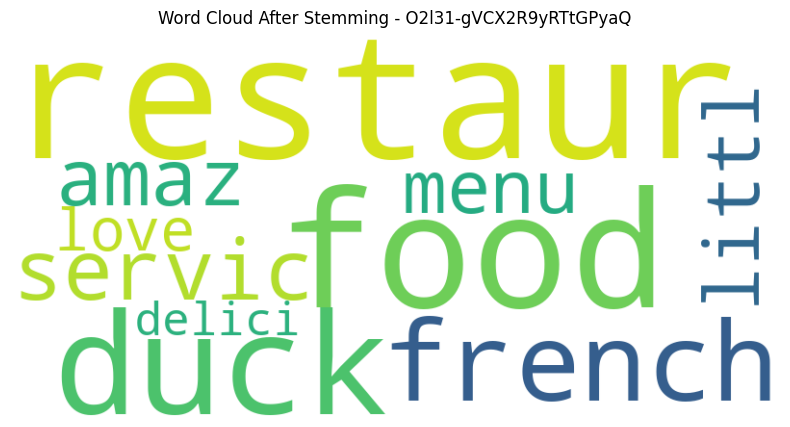

9X2rQUHO_ka0k7tu7wr_7g - Number of words before stemming: 1433
9X2rQUHO_ka0k7tu7wr_7g - Number of words after stemming: 1175


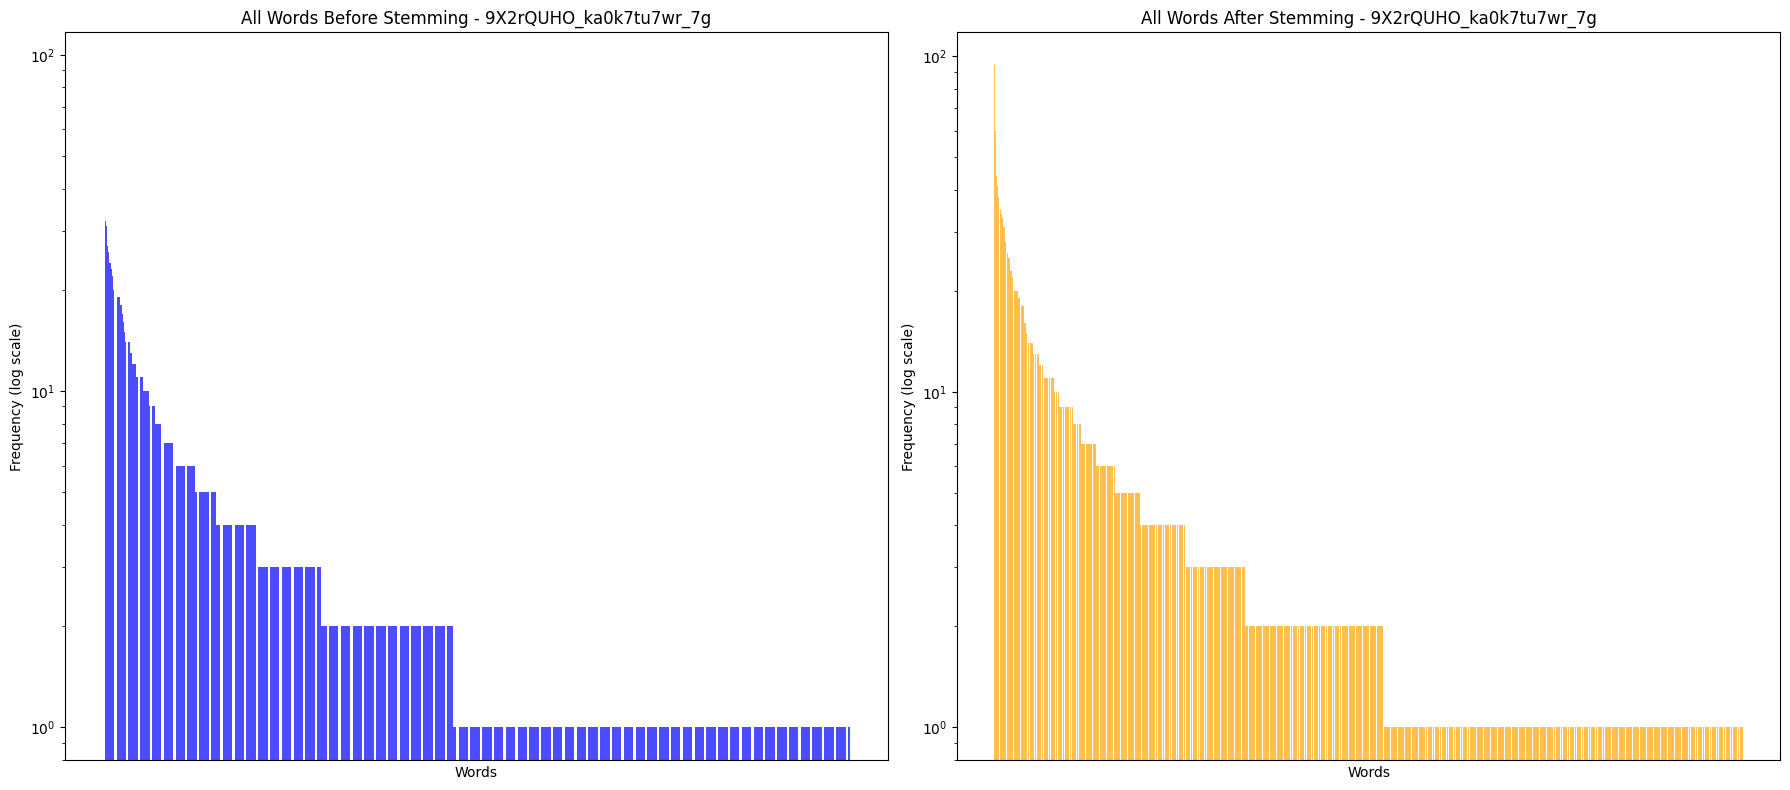

O2l31-gVCX2R9yRTtGPyaQ - Number of words before stemming: 845
O2l31-gVCX2R9yRTtGPyaQ - Number of words after stemming: 743


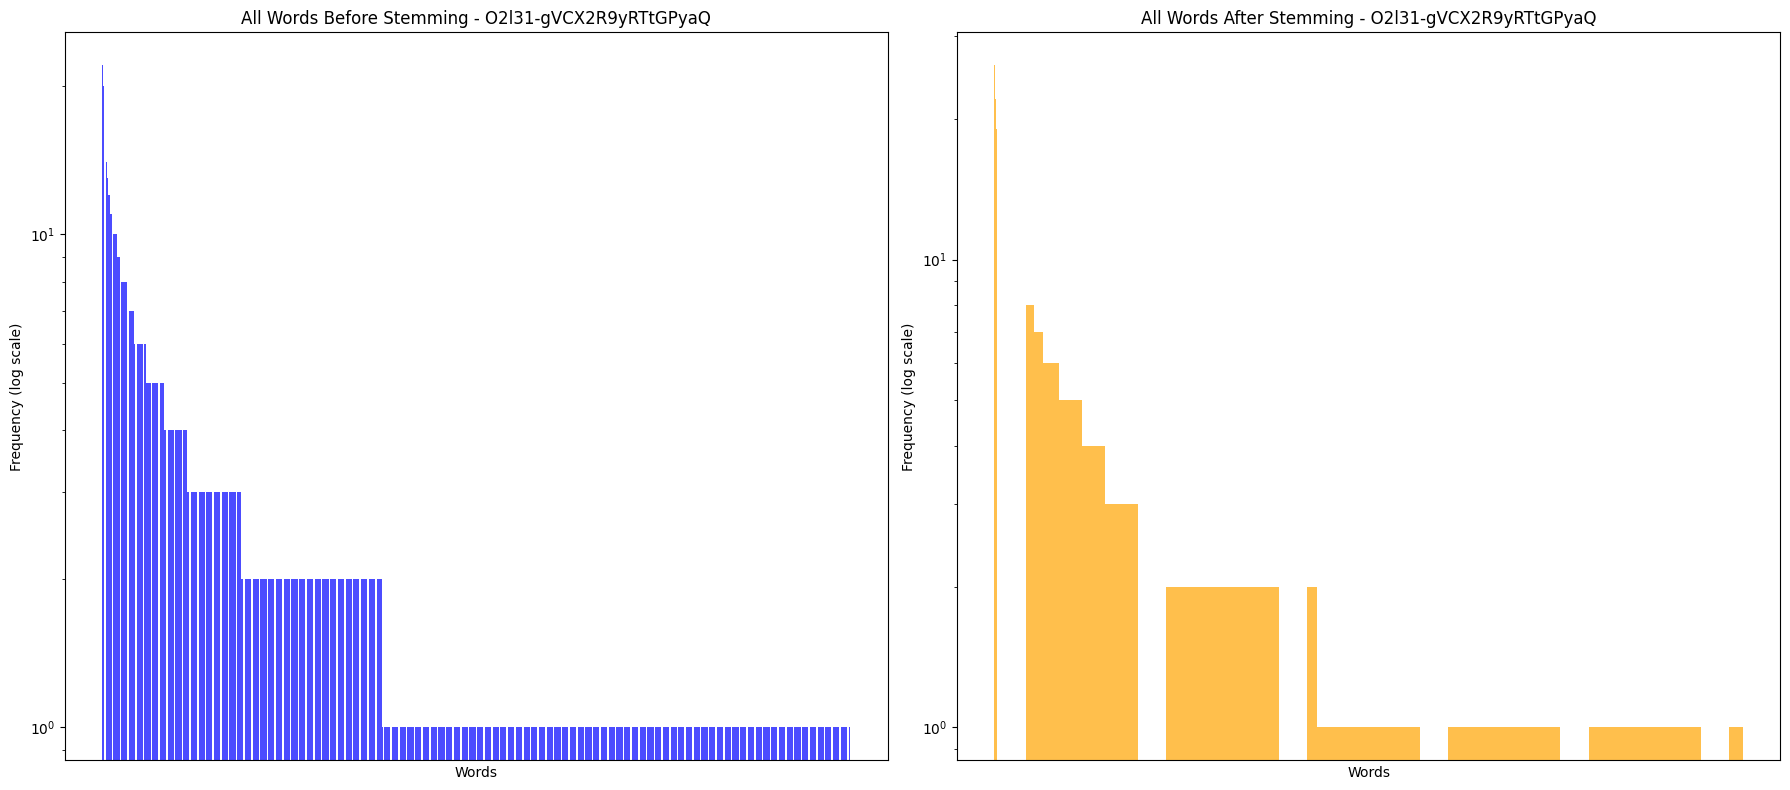

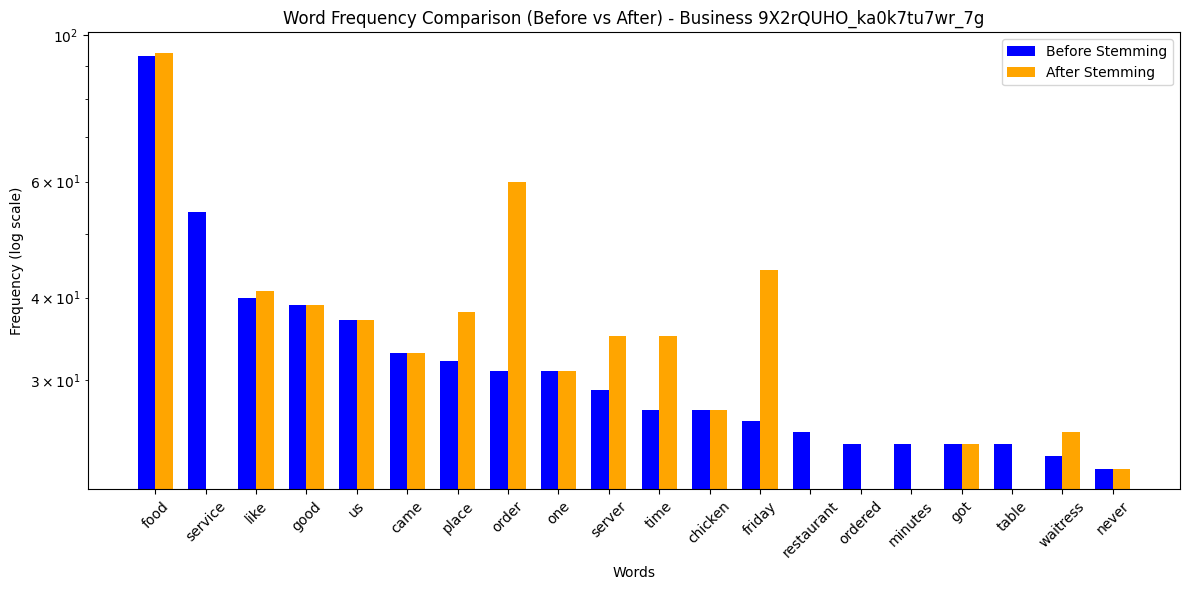

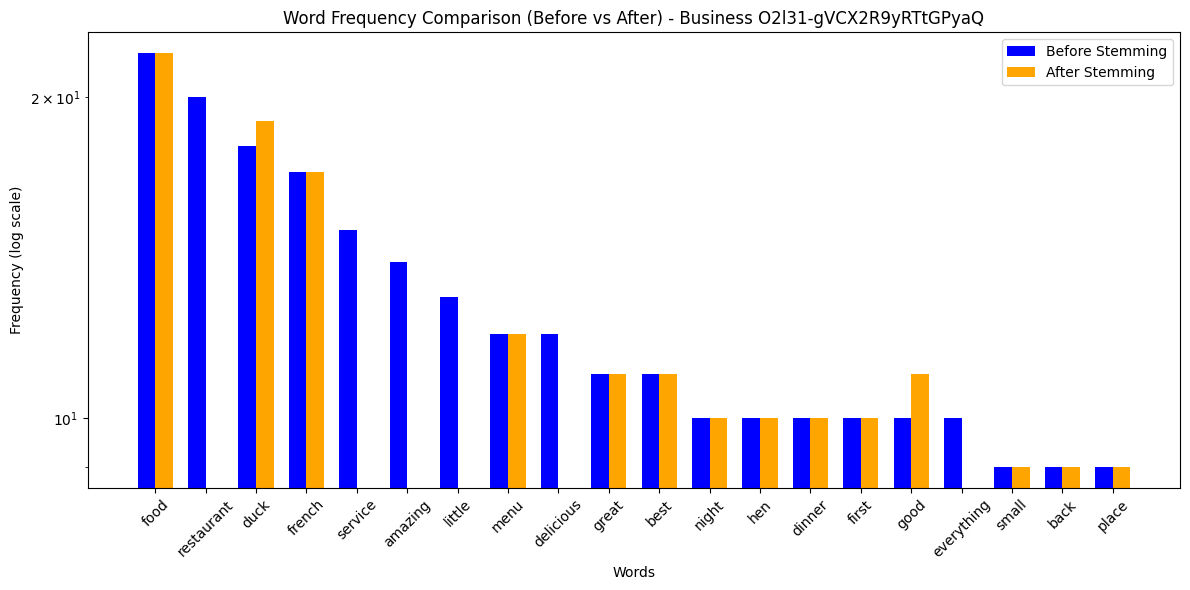

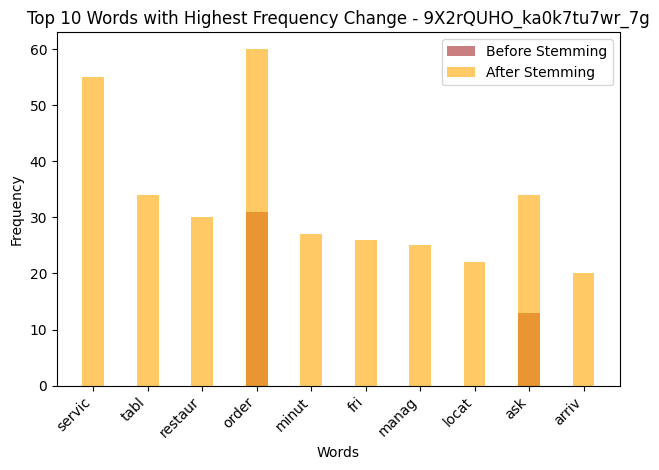

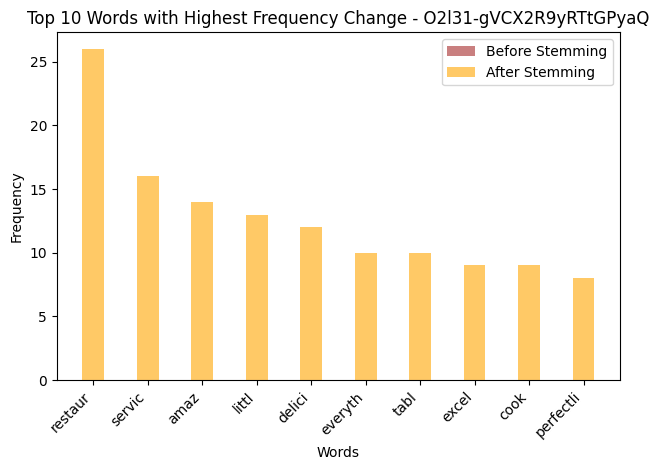

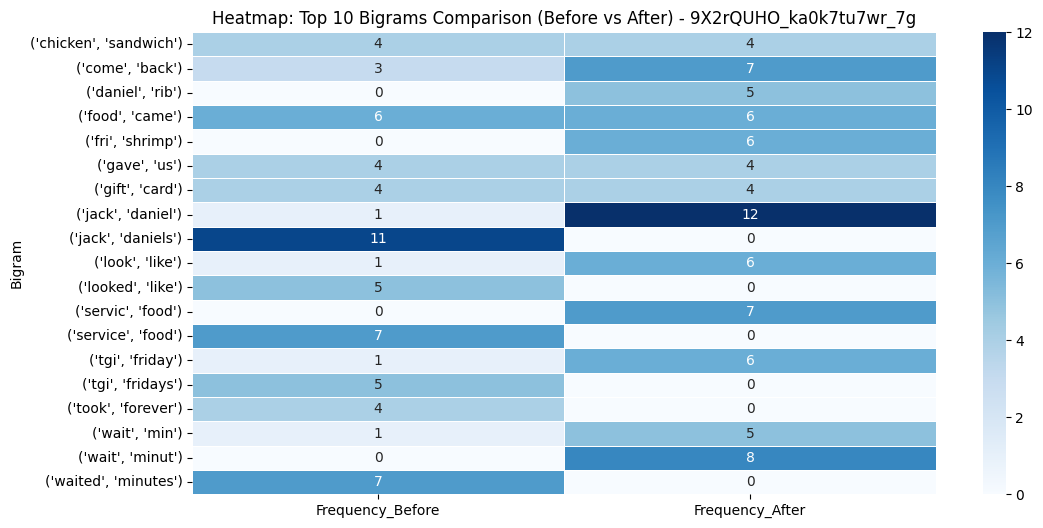

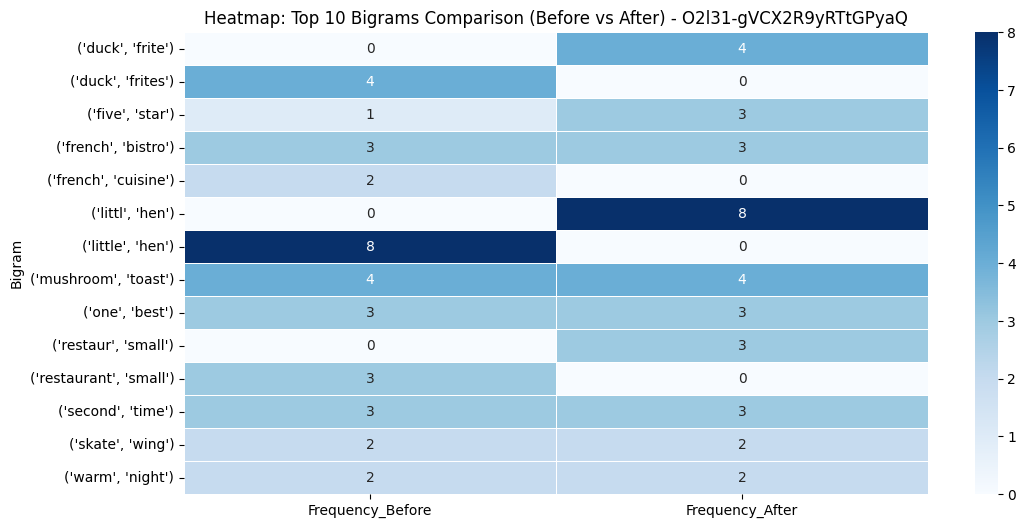

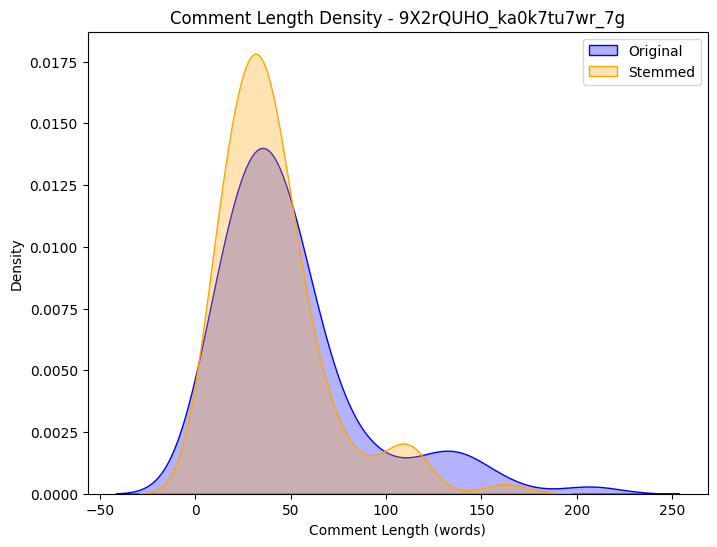

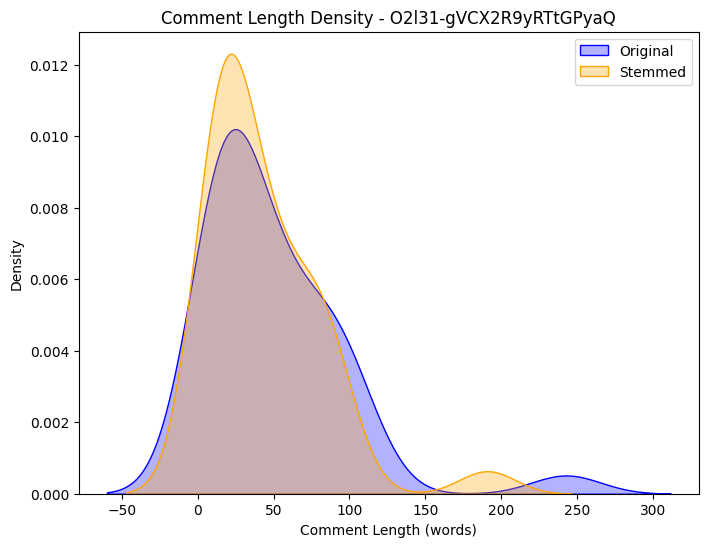

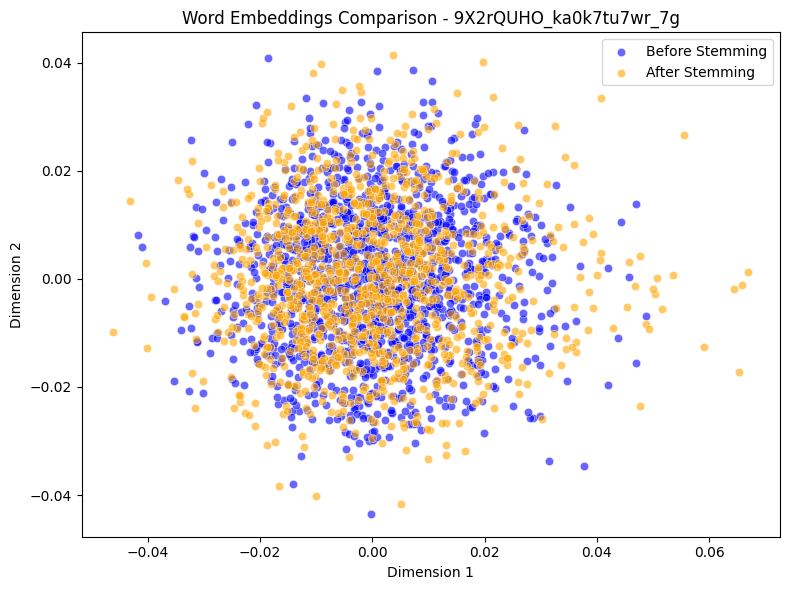

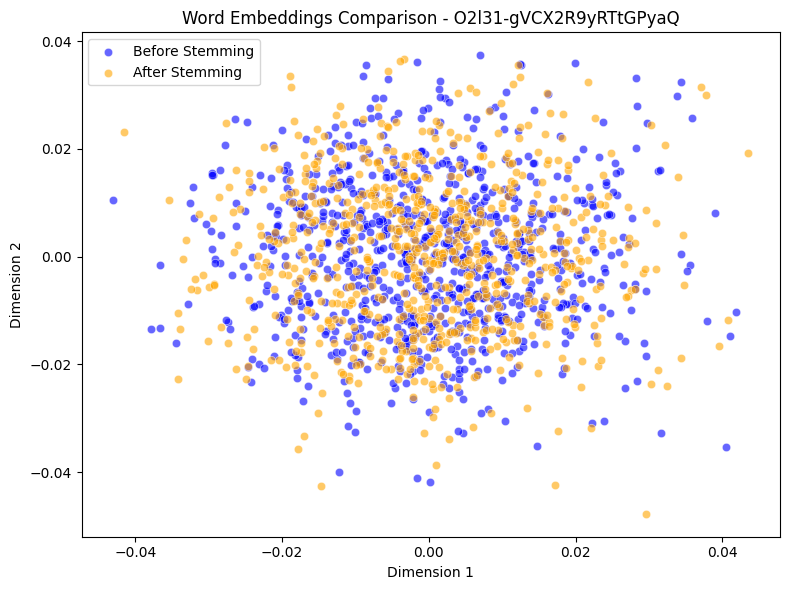

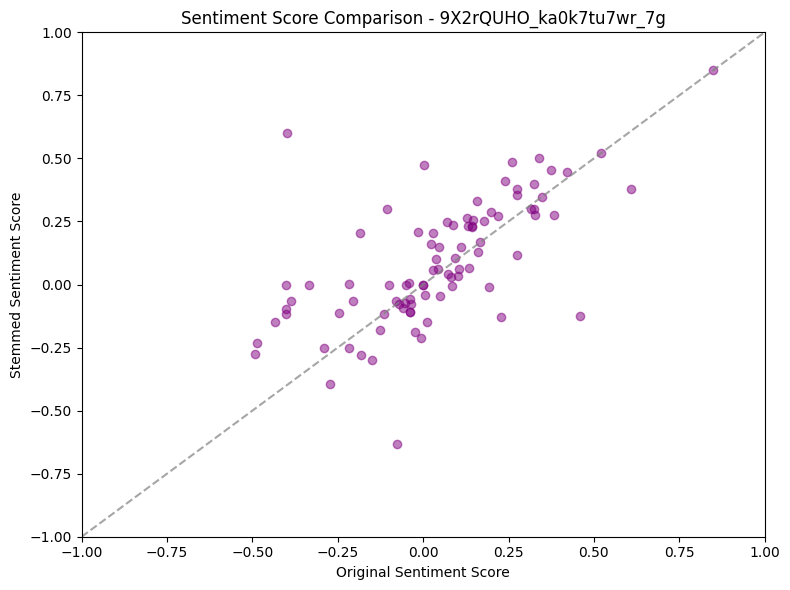

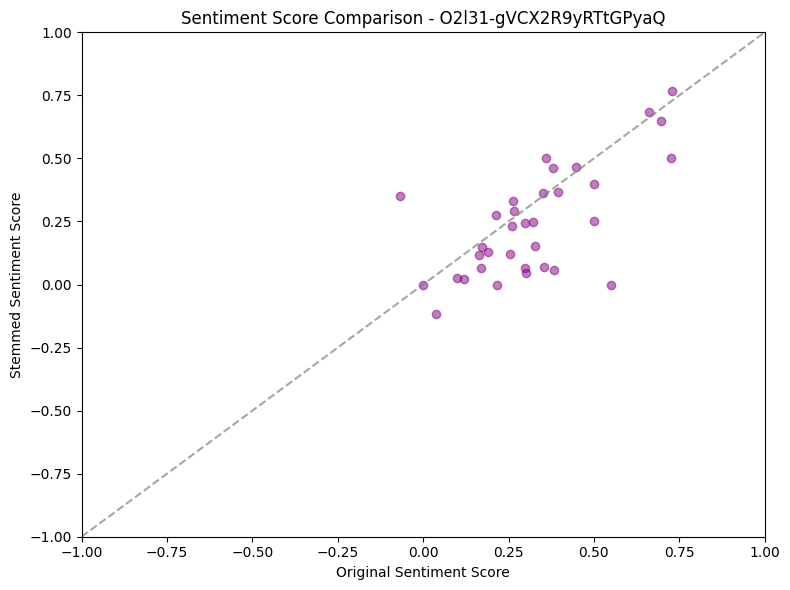

<ipython-input-55-d3dc9900c725>:587: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Version', y='Sentiment Score', data=df, palette='Set2')


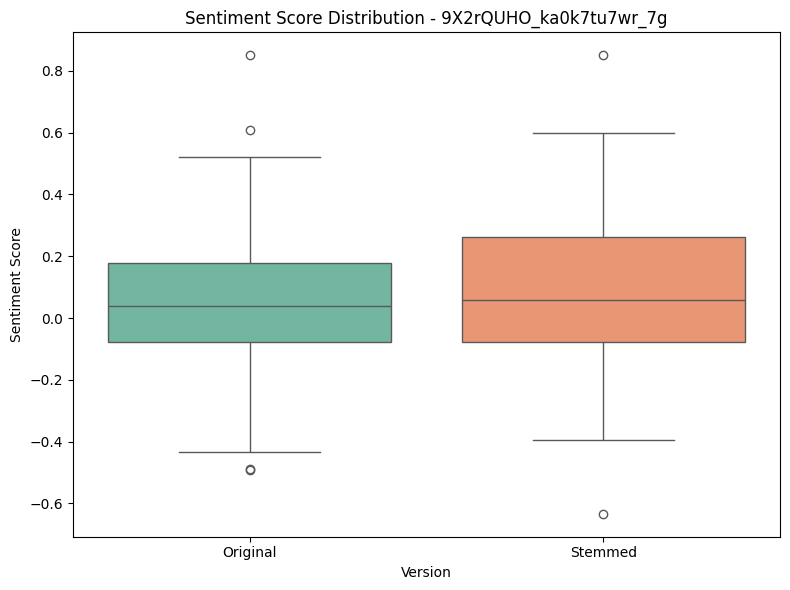

<ipython-input-55-d3dc9900c725>:587: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Version', y='Sentiment Score', data=df, palette='Set2')


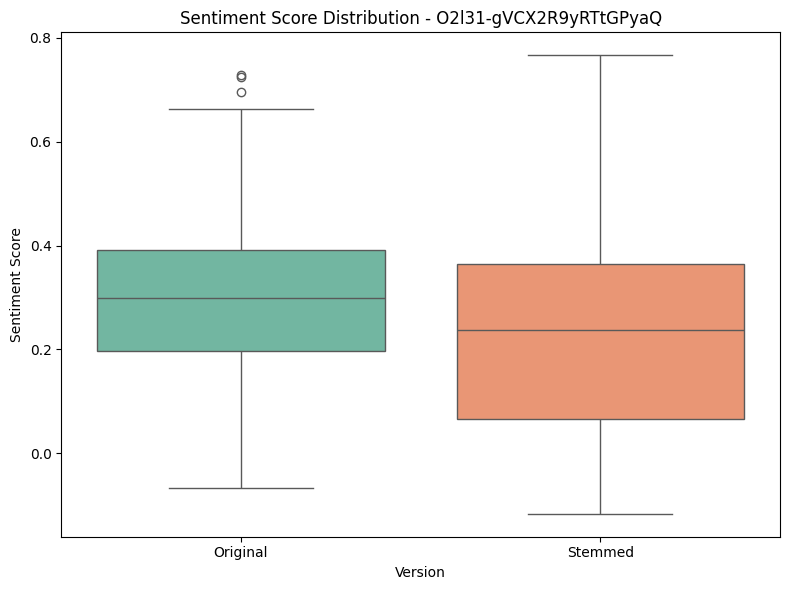

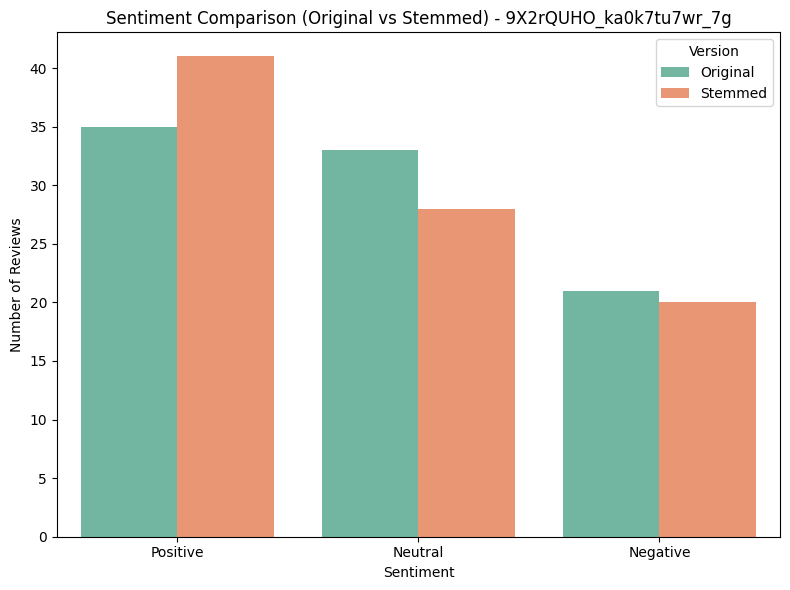

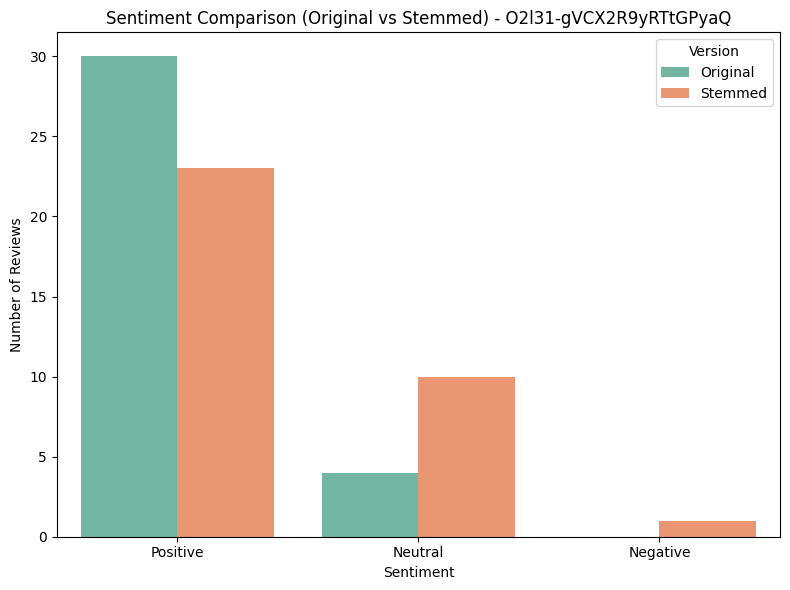

In [ ]:
import random
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
from google.colab import drive
import seaborn as sns

# Download NLTK resources if not available
nltk.download('punkt')
nltk.download('stopwords')

# Mount Google Drive
drive.mount('/content/drive')

# Load the datasets from Google Drive
business_file_path = '/content/drive/MyDrive/nj_business.json'
review_file_path = '/content/drive/MyDrive/nj_reviews.json'

# Load business and review data
nj_business = pd.read_json(business_file_path, orient='records')
nj_reviews = pd.read_json(review_file_path, orient='records')
print("Datasets loaded successfully!")

# Initialize the stemmer and extended stopwords
stemmer = PorterStemmer()
custom_stopwords = {"would", "get", "go", "could", "see", "even", "much", "make", "also"}
stop_words = set(stopwords.words('english')).union(custom_stopwords)

# Randomly select two business IDs
selected_business_ids = random.sample(nj_business['business_id'].tolist(), 2)
print(f"Selected Business IDs: {selected_business_ids}")

# Analyze word frequency for a business
def analyze_business_reviews(business_id):
    reviews = nj_reviews[nj_reviews['business_id'] == business_id]
    all_text = " ".join(reviews['text'].tolist())
    tokens = word_tokenize(all_text.lower())
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    word_freq_before = Counter(filtered_tokens)
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    word_freq_after = Counter(stemmed_tokens)
    return word_freq_before, word_freq_after

# Analyze both businesses
word_freq_b1_before, word_freq_b1_after = analyze_business_reviews(selected_business_ids[0])
word_freq_b2_before, word_freq_b2_after = analyze_business_reviews(selected_business_ids[1])

### 1.1 Bar Chart Comparison (Log Scale)

def plot_word_freq_comparison(business_id, freq_before, freq_after):
    # Prepare data
    df_before = pd.DataFrame(freq_before.most_common(10), columns=['Word', 'Frequency'])
    df_after = pd.DataFrame(freq_after.most_common(10), columns=['Word', 'Frequency'])

    # Create subplots
    plt.figure(figsize=(16, 6))

    # Plot Before Stemming
    plt.subplot(1, 2, 1)
    plt.bar(df_before['Word'], df_before['Frequency'], color='blue', alpha=0.7)
    plt.xticks(rotation=45, ha='right')
    plt.yscale('log')
    plt.title(f'Top 10 Words Before Stemming - {business_id}')
    plt.xlabel('Words')
    plt.ylabel('Frequency (log scale)')

    # Plot After Stemming
    plt.subplot(1, 2, 2)
    plt.bar(df_after['Word'], df_after['Frequency'], color='orange', alpha=0.7)
    plt.xticks(rotation=45, ha='right')
    plt.yscale('log')
    plt.title(f'Top 10 Words After Stemming - {business_id}')
    plt.xlabel('Words')
    plt.ylabel('Frequency (log scale)')

    plt.tight_layout()
    plt.show()

# Plot bar chart comparison for both businesses
plot_word_freq_comparison(selected_business_ids[0], word_freq_b1_before, word_freq_b1_after)
plot_word_freq_comparison(selected_business_ids[1], word_freq_b2_before, word_freq_b2_after)

### 1.2 Top 10 Words Log Scale Comparison with Grouped Bar Chart

import matplotlib.pyplot as plt
import pandas as pd

def plot_top10_comparison(business_id, freq_before, freq_after):
    # Step 1: Get top 10 words based on 'before' stemming frequencies
    df_before = pd.DataFrame(freq_before.most_common(10), columns=['Word', 'Frequency'])
    top_words_before = set(df_before['Word'].tolist())

    # Step 2: Get top 10 words based on 'after' stemming frequencies
    df_after = pd.DataFrame(freq_after.most_common(10), columns=['Word', 'Frequency'])
    top_words_after = set(df_after['Word'].tolist())

    # Step 3: Combine both top word sets to get unique x-axis labels
    combined_words = list(top_words_before | top_words_after)

    # Step 4: Sort combined words based on 'before' stemming frequency (descending)
    combined_words.sort(key=lambda word: freq_before.get(word, 0), reverse=True)

    # Step 5: Prepare frequencies for 'before' and 'after' for each word in combined list
    df_before = pd.DataFrame([(word, freq_before.get(word, 0)) for word in combined_words],
                             columns=['Word', 'Frequency'])
    df_after = pd.DataFrame([(word, freq_after.get(word, 0)) for word in combined_words],
                            columns=['Word', 'Frequency'])

    # Plotting
    plt.figure(figsize=(12, 6))
    bar_width = 0.35

    # Define x-axis positions
    r1 = range(len(combined_words))
    r2 = [x + bar_width for x in r1]

    # Plot 'before' stemming frequencies
    plt.bar(r1, df_before['Frequency'], color='blue', width=bar_width, label='Before Stemming')

    # Plot 'after' stemming frequencies
    plt.bar(r2, df_after['Frequency'], color='orange', width=bar_width, label='After Stemming')

    # Add labels, title, and formatting
    plt.xticks([r + bar_width / 2 for r in range(len(combined_words))], combined_words, rotation=45)
    plt.yscale('log')
    plt.xlabel('Words')
    plt.ylabel('Frequency (log scale)')
    plt.title(f'Top 10 Word Frequency Comparison (Before vs After) - Business {business_id}')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage
plot_top10_comparison(selected_business_ids[0], word_freq_b1_before, word_freq_b1_after)
plot_top10_comparison(selected_business_ids[1], word_freq_b2_before, word_freq_b2_after)

### 1.3 Heatmap Comparison: Top 10 Words Before Stemming
def plot_combined_heatmap_comparison(freq_before, freq_after, business_id):
    # Create DataFrames for top 10 words before and after stemming
    df_before = pd.DataFrame(freq_before.most_common(10), columns=['Word', 'Frequency_Before'])
    df_after = pd.DataFrame(freq_after.most_common(10), columns=['Word', 'Frequency_After'])

    # Merge the two DataFrames on 'Word', filling missing values with 0
    merged_df = pd.merge(df_before, df_after, on='Word', how='outer').fillna(0)
    merged_df.set_index('Word', inplace=True)

    # Plot heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(merged_df, annot=True, cmap='Blues', fmt='.0f', linewidths=0.5)

    # Set the title and show the plot
    plt.title(f'Heatmap: Top 10 Words Comparison - {business_id}')
    plt.show()

# Example usage for a business
plot_combined_heatmap_comparison(word_freq_b1_before, word_freq_b1_after,
                                 selected_business_ids[0])

plot_combined_heatmap_comparison(word_freq_b2_before, word_freq_b2_after,
                                 selected_business_ids[1])

### 1.4 Word Cloud Visualization

def plot_wordcloud(freq, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Plot word clouds for both businesses (before and after stemming)
plot_wordcloud(dict(word_freq_b1_before.most_common(10)),
               f'Word Cloud Before Stemming - {selected_business_ids[0]}')
plot_wordcloud(dict(word_freq_b1_after.most_common(10)),
               f'Word Cloud After Stemming - {selected_business_ids[0]}')

plot_wordcloud(dict(word_freq_b2_before.most_common(10)),
               f'Word Cloud Before Stemming - {selected_business_ids[1]}')
plot_wordcloud(dict(word_freq_b2_after.most_common(10)),
               f'Word Cloud After Stemming - {selected_business_ids[1]}')

### 1.5 Plot All Words Log Scale Distribution

def plot_all_word_freq(business_id, freq_before, freq_after):
    # Convert to DataFrame
    df_before = pd.DataFrame(freq_before.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
    df_after = pd.DataFrame(freq_after.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

    # Calculate and print the number of unique words
    words_before_count = len(df_before)
    words_after_count = len(df_after)
    print(f"{business_id} - Number of words before stemming: {words_before_count}")
    print(f"{business_id} - Number of words after stemming: {words_after_count}")

    # Create subplots
    plt.figure(figsize=(18, 8))

    # Plot Before Stemming
    plt.subplot(1, 2, 1)
    plt.bar(df_before['Word'], df_before['Frequency'], color='blue', alpha=0.7)
    plt.xticks(rotation=90, ha='right')
    plt.yscale('log')
    plt.title(f'All Words Before Stemming - {business_id}')
    plt.xlabel('Words')
    plt.ylabel('Frequency (log scale)')
    plt.gca().set_xticks([])  # Remove x-axis words

    # Plot After Stemming
    plt.subplot(1, 2, 2)
    plt.bar(df_after['Word'], df_after['Frequency'], color='orange', alpha=0.7)
    plt.xticks(rotation=90, ha='right')
    plt.yscale('log')
    plt.title(f'All Words After Stemming - {business_id}')
    plt.xlabel('Words')
    plt.ylabel('Frequency (log scale)')
    plt.gca().set_xticks([])  # Remove x-axis words

    plt.tight_layout()
    plt.show()

# Example usage
plot_all_word_freq(selected_business_ids[0], word_freq_b1_before, word_freq_b1_after)
plot_all_word_freq(selected_business_ids[1], word_freq_b2_before, word_freq_b2_after)


### 1.6 Additional Combined Comparison Plot

def plot_combined_stemming_comparison(business_id, freq_before, freq_after):
    # Ensure both DataFrames have the same 20 words (based on 'before' stemming)
    df_before = pd.DataFrame(freq_before.most_common(20), columns=['Word', 'Frequency'])
    words = df_before['Word'].tolist()  # Use these words as the x-axis

    # Create a DataFrame with 'after' stemming frequencies matching the same words
    df_after = pd.DataFrame([(word, freq_after.get(word, 0)) for word in words],
                            columns=['Word', 'Frequency'])

    # Plot both 'before' and 'after' on the same chart
    plt.figure(figsize=(12, 6))
    bar_width = 0.35  # Width of each bar

    # X-axis positions for 'before' and 'after' bars
    r1 = range(len(df_before))
    r2 = [x + bar_width for x in r1]

    # Plot bars for 'before' stemming
    plt.bar(r1, df_before['Frequency'], color='blue', width=bar_width, label='Before Stemming')

    # Plot bars for 'after' stemming
    plt.bar(r2, df_after['Frequency'], color='orange', width=bar_width, label='After Stemming')

    # Add labels and title
    plt.xticks([r + bar_width / 2 for r in range(len(df_before))], words, rotation=45)
    plt.yscale('log')
    plt.xlabel('Words')
    plt.ylabel('Frequency (log scale)')
    plt.title(f'Word Frequency Comparison (Before vs After) - Business {business_id}')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot combined comparison for both businesses
plot_combined_stemming_comparison(selected_business_ids[0], word_freq_b1_before, word_freq_b1_after)
plot_combined_stemming_comparison(selected_business_ids[1], word_freq_b2_before, word_freq_b2_after)

### 1.7 Identify and Visualize Top 10 Words with Highest Frequency Increase
import seaborn as sns

# Function to calculate frequency change due to stemming
def calculate_frequency_change(freq_before, freq_after):
    # Combine both dictionaries into a single DataFrame for easier comparison
    before_df = pd.DataFrame(freq_before.items(), columns=['Word', 'Frequency_Before'])
    after_df = pd.DataFrame(freq_after.items(), columns=['Word', 'Frequency_After'])

    # Merge on the word column to align frequencies
    merged_df = pd.merge(before_df, after_df, on='Word', how='outer').fillna(0)

    # Calculate frequency change
    merged_df['Frequency_Change'] = merged_df['Frequency_After'] - merged_df['Frequency_Before']

    # Sort by frequency change in descending order
    merged_df = merged_df.sort_values(by='Frequency_Change', ascending=False)

    # Return the top 10 words with the largest frequency increase
    return merged_df.head(10)

# Analyze the frequency increase for both businesses
top_changes_b1 = calculate_frequency_change(word_freq_b1_before, word_freq_b1_after)
top_changes_b2 = calculate_frequency_change(word_freq_b2_before, word_freq_b2_after)

#Overlapping Bar Chart: Frequency Comparison Visualization
def plot_overlapping_frequency_change(merged_df, business_id):
    # Prepare data for plotting
    x = range(len(merged_df))  # X-axis positions
    width = 0.4  # Width of the bars

    # Plot "Frequency Before" bars
    plt.bar(x, merged_df['Frequency_Before'], width=width, label='Before Stemming',
            color='brown', alpha=0.6)

    # Plot "Frequency After" bars (slightly offset for overlap)
    plt.bar(x, merged_df['Frequency_After'], width=width, label='After Stemming',
            color='orange', alpha=0.6)

    # Set x-axis with word labels
    plt.xticks(x, merged_df['Word'], rotation=45, ha='right')

    # Add title and labels
    plt.title(f'Top 10 Words with Highest Frequency Change - {business_id}')
    plt.ylabel('Frequency')
    plt.xlabel('Words')

    # Display legend
    plt.legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Plot overlapping bar charts for both businesses
plot_overlapping_frequency_change(top_changes_b1, selected_business_ids[0])
plot_overlapping_frequency_change(top_changes_b2, selected_business_ids[1])

### Step 2: N-gram Analysis
from nltk import bigrams
from collections import Counter
# Function to preprocess and optionally stem text
# Function to preprocess and optionally stem text
def preprocess_text(text, stem=False):
    words = [word for word in text.lower().split() if word.isalpha() and word not in stop_words]
    if stem:
        words = [stemmer.stem(word) for word in words]
    return words

# Calculate bigram frequencies
def get_bigram_freq(reviews, stem=False):
    bigram_list = []
    for review in reviews:
        processed_words = preprocess_text(review, stem=stem)
        bigram_list.extend(bigrams(processed_words))
    return Counter(bigram_list)

# Function to plot heatmap comparison for top 10 bigrams
def plot_combined_heatmap_comparison(bigram_freq_before, bigram_freq_after, business_id):
    # Get the top 10 bigrams from both 'before' and 'after' stemming
    top_bigrams_before = [bigram for bigram, _ in bigram_freq_before.most_common(10)]
    top_bigrams_after = [bigram for bigram, _ in bigram_freq_after.most_common(10)]

    # Combine them to get unique bigrams for x-axis
    all_bigrams = list(dict.fromkeys(top_bigrams_before + top_bigrams_after))  # Maintain order and remove duplicates

    # Create DataFrames for the top bigrams before and after stemming
    df_before = pd.DataFrame([(bigram, bigram_freq_before.get(bigram, 0)) for bigram in all_bigrams],
                             columns=['Bigram', 'Frequency_Before'])
    df_after = pd.DataFrame([(bigram, bigram_freq_after.get(bigram, 0)) for bigram in all_bigrams],
                            columns=['Bigram', 'Frequency_After'])

    # Merge the two DataFrames on 'Bigram', filling missing values with 0
    merged_df = pd.merge(df_before, df_after, on='Bigram', how='outer').fillna(0)
    merged_df.set_index('Bigram', inplace=True)

    # Plot heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(merged_df, annot=True, cmap='Blues', fmt='.0f', linewidths=0.5)

    # Set the title and show the plot
    plt.title(f'Heatmap: Top 10 Bigrams Comparison (Before vs After) - {business_id}')
    plt.show()

# Analyze and plot for each selected business
for business_id in selected_business_ids:
    # Filter reviews for this business
    reviews = nj_reviews[nj_reviews['business_id'] == business_id]['text'].tolist()

    # Calculate bigram frequencies before and after stemming
    bigram_freq_before = get_bigram_freq(reviews, stem=False)
    bigram_freq_after = get_bigram_freq(reviews, stem=True)

    # Plot bigram comparison heatmap for this business
    plot_combined_heatmap_comparison(bigram_freq_before, bigram_freq_after, business_id)

### Step 3: Comment Length Distribution Analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate comment lengths (before and after stemming)
def calculate_comment_lengths(business_id):
    reviews = nj_reviews[nj_reviews['business_id'] == business_id]

    # Store lengths for original and stemmed versions
    original_lengths = []
    stemmed_lengths = []

    for review in reviews['text']:
        # Tokenize and filter stopwords
        tokens = word_tokenize(review.lower())
        filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

        # Original length: without stemming, just filtered tokens
        original_lengths.append(len(filtered_tokens))

        # Stemmed tokens with duplicates removed (to reflect merging of word forms)
        stemmed_tokens = set([stemmer.stem(word) for word in filtered_tokens])
        stemmed_lengths.append(len(stemmed_tokens))

    return original_lengths, stemmed_lengths

# Calculate comment lengths for both businesses
lengths_b1 = calculate_comment_lengths(selected_business_ids[0])
lengths_b2 = calculate_comment_lengths(selected_business_ids[1])

### 3.1 Density Plot: Length Trend Comparison

def plot_density_comparison(lengths, business_id):
    original_lengths, stemmed_lengths = lengths

    plt.figure(figsize=(8, 6))

    sns.kdeplot(original_lengths, label='Original', color='blue', fill=True, alpha=0.3)
    sns.kdeplot(stemmed_lengths, label='Stemmed', color='orange', fill=True, alpha=0.3)

    plt.title(f'Comment Length Density - {business_id}')
    plt.xlabel('Comment Length (words)')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Plot density comparison for both businesses
plot_density_comparison(lengths_b1, selected_business_ids[0])
plot_density_comparison(lengths_b2, selected_business_ids[1])

### Step 4: Word Embedding Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Function to train the Word2Vec model
def train_word2vec(tokens_list):
    model = Word2Vec(sentences=tokens_list, vector_size=50, window=5, min_count=1, sg=0)
    return model

# Prepare data: Extract tokens from business reviews
def prepare_tokenized_reviews(business_id):
    reviews = nj_reviews[nj_reviews['business_id'] == business_id]
    tokens_list = []

    for review in reviews['text']:
        # Tokenize and remove stop words
        tokens = word_tokenize(review.lower())
        filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
        tokens_list.append(filtered_tokens)

    return tokens_list

# Train Word2Vec models for two businesses
tokens_b1 = prepare_tokenized_reviews(selected_business_ids[0])
tokens_b2 = prepare_tokenized_reviews(selected_business_ids[1])

# Train embeddings for before and after stemming
model_b1_before = train_word2vec(tokens_b1)
model_b1_after = train_word2vec([[stemmer.stem(word) for word in tokens] for tokens in tokens_b1])

model_b2_before = train_word2vec(tokens_b2)
model_b2_after = train_word2vec([[stemmer.stem(word) for word in tokens] for tokens in tokens_b2])

### Dimensionality reduction using PCA or t-SNE
def reduce_dimensions(model, method='pca'):
    words = list(model.wv.index_to_key)  # Get the vocabulary
    vectors = model.wv[words]  # Retrieve corresponding word vectors

    if method == 'pca':
        reducer = PCA(n_components=2)
    else:
        reducer = TSNE(n_components=2, random_state=42)

    reduced_vectors = reducer.fit_transform(vectors)
    return pd.DataFrame(reduced_vectors, index=words, columns=['x', 'y'])

# Dimensionality reduction: Compute embeddings for four models
reduced_b1_before = reduce_dimensions(model_b1_before)
reduced_b1_after = reduce_dimensions(model_b1_after)

reduced_b2_before = reduce_dimensions(model_b2_before)
reduced_b2_after = reduce_dimensions(model_b2_after)

### Visualize the word embeddings for both businesses
def plot_combined_embeddings(reduced_vectors_before, reduced_vectors_after, business_id):
    plt.figure(figsize=(8, 6))

    # Plot word embeddings before stemming (blue)
    sns.scatterplot(x='x', y='y', data=reduced_vectors_before, alpha=0.6, color='blue', label='Before Stemming')

    # Plot word embeddings after stemming (orange)
    sns.scatterplot(x='x', y='y', data=reduced_vectors_after, alpha=0.6, color='orange', label='After Stemming')

    # Set title and axis labels
    plt.title(f'Word Embeddings Comparison - {business_id}')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')

    # Add legend
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()

# Plot word embedding comparison for both businesses
plot_combined_embeddings(reduced_b1_before, reduced_b1_after, selected_business_ids[0])
plot_combined_embeddings(reduced_b2_before, reduced_b2_after, selected_business_ids[1])



### Step 5: Sentiment Analysis
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate sentiment score for each review
def calculate_sentiment_scores(business_id):
    reviews = nj_reviews[nj_reviews['business_id'] == business_id]

    original_scores = []
    stemmed_scores = []

    for review in reviews['text']:
        # Original sentiment score using TextBlob
        original_score = TextBlob(review).sentiment.polarity
        original_scores.append(original_score)

        # Stemmed version sentiment score
        tokens = word_tokenize(review.lower())
        stemmed_tokens = [stemmer.stem(word) for word in tokens if word.isalpha() and word not in stop_words]
        stemmed_review = " ".join(stemmed_tokens)
        stemmed_score = TextBlob(stemmed_review).sentiment.polarity
        stemmed_scores.append(stemmed_score)

    return original_scores, stemmed_scores

# Calculate sentiment scores for both businesses
sentiment_b1 = calculate_sentiment_scores(selected_business_ids[0])
sentiment_b2 = calculate_sentiment_scores(selected_business_ids[1])

### 5.1 Scatter Plot: Sentiment Score Comparison (Before vs After Stemming)

def plot_sentiment_scatter(sentiment, business_id):
    original_scores, stemmed_scores = sentiment

    plt.figure(figsize=(8, 6))
    plt.scatter(original_scores, stemmed_scores, alpha=0.5, color='purple')
    plt.plot([-1, 1], [-1, 1], linestyle='--', color='gray', alpha=0.7)  # Diagonal reference line
    plt.title(f'Sentiment Score Comparison - {business_id}')
    plt.xlabel('Original Sentiment Score')
    plt.ylabel('Stemmed Sentiment Score')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.tight_layout()
    plt.show()

# Plot sentiment scatter plots for both businesses
plot_sentiment_scatter(sentiment_b1, selected_business_ids[0])
plot_sentiment_scatter(sentiment_b2, selected_business_ids[1])

### 5.2 Box Plot: Sentiment Score Distribution

def plot_sentiment_boxplot(sentiment, business_id):
    original_scores, stemmed_scores = sentiment

    # Prepare DataFrame for seaborn boxplot
    df = pd.DataFrame({
        'Sentiment Score': original_scores + stemmed_scores,
        'Version': ['Original'] * len(original_scores) + ['Stemmed'] * len(stemmed_scores)
    })

    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Version', y='Sentiment Score', data=df, palette='Set2')
    plt.title(f'Sentiment Score Distribution - {business_id}')
    plt.xlabel('Version')
    plt.ylabel('Sentiment Score')
    plt.tight_layout()
    plt.show()

# Plot sentiment boxplots for both businesses
plot_sentiment_boxplot(sentiment_b1, selected_business_ids[0])
plot_sentiment_boxplot(sentiment_b2, selected_business_ids[1])

### 5.3 Sentiment Polarity Distribution
# Function to classify sentiment with custom thresholds
def classify_sentiment(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Function to calculate sentiment counts for a business
def calculate_sentiment_counts(business_id):
    reviews = nj_reviews[nj_reviews['business_id'] == business_id]

    # Store sentiment counts for original and stemmed versions
    original_sentiment = {'Positive': 0, 'Neutral': 0, 'Negative': 0}
    stemmed_sentiment = {'Positive': 0, 'Neutral': 0, 'Negative': 0}

    for review in reviews['text']:
        # Original sentiment classification
        original_score = TextBlob(review).sentiment.polarity
        original_label = classify_sentiment(original_score)
        original_sentiment[original_label] += 1

        # Stemmed version sentiment classification
        tokens = word_tokenize(review.lower())
        stemmed_tokens = [stemmer.stem(word) for word in tokens if word.isalpha() and word not in stop_words]
        stemmed_review = " ".join(stemmed_tokens)
        stemmed_score = TextBlob(stemmed_review).sentiment.polarity
        stemmed_label = classify_sentiment(stemmed_score)
        stemmed_sentiment[stemmed_label] += 1

    return original_sentiment, stemmed_sentiment

# Calculate sentiment counts for both businesses
sentiment_counts_b1 = calculate_sentiment_counts(selected_business_ids[0])
sentiment_counts_b2 = calculate_sentiment_counts(selected_business_ids[1])

### Visualization: Compare Sentiment Counts Before and After Stemming on a Single Chart

def plot_sentiment_comparison_single_chart(sentiment_counts, business_id):
    original_sentiment, stemmed_sentiment = sentiment_counts

    # Prepare DataFrame for visualization
    df = pd.DataFrame({
        'Sentiment': list(original_sentiment.keys()),
        'Original': list(original_sentiment.values()),
        'Stemmed': list(stemmed_sentiment.values())
    })

    # Melt the DataFrame to long format for seaborn
    df_melted = df.melt(id_vars='Sentiment', var_name='Version', value_name='Count')

    # Plot the comparison on a single chart
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Sentiment', y='Count', hue='Version', data=df_melted, palette='Set2')
    plt.title(f'Sentiment Comparison (Original vs Stemmed) - {business_id}')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Reviews')
    plt.legend(title='Version', loc='upper right')
    plt.tight_layout()
    plt.show()

# Plot sentiment comparison for both businesses
plot_sentiment_comparison_single_chart(sentiment_counts_b1, selected_business_ids[0])
plot_sentiment_comparison_single_chart(sentiment_counts_b2, selected_business_ids[1])

To avoid accidentally re-running the random selection algorithm and refreshing the analysis results, the following displays the analysis based on the fixed Selected Business IDs:

`['9X2rQUHO_ka0k7tu7wr_7g', 'O2l31-gVCX2R9yRTtGPyaQ']`.



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Datasets loaded successfully!
Using Fixed Business IDs: ['9X2rQUHO_ka0k7tu7wr_7g', 'O2l31-gVCX2R9yRTtGPyaQ']


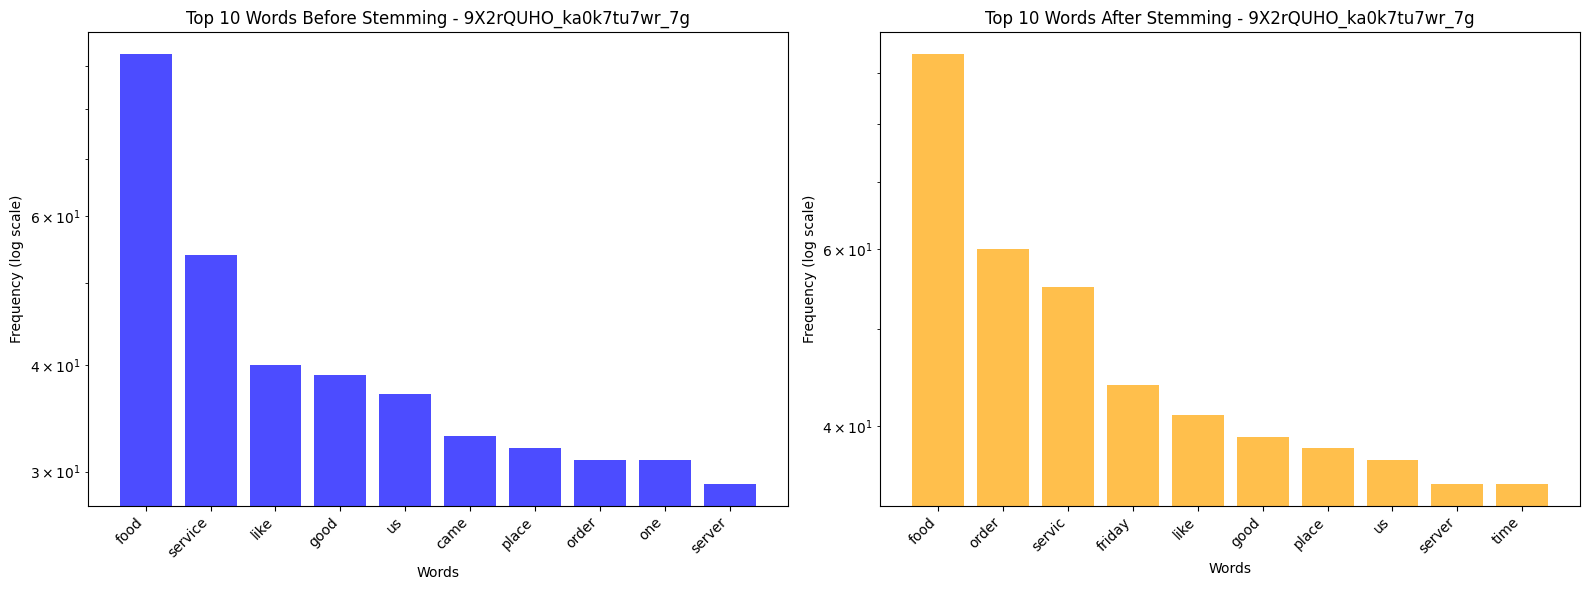

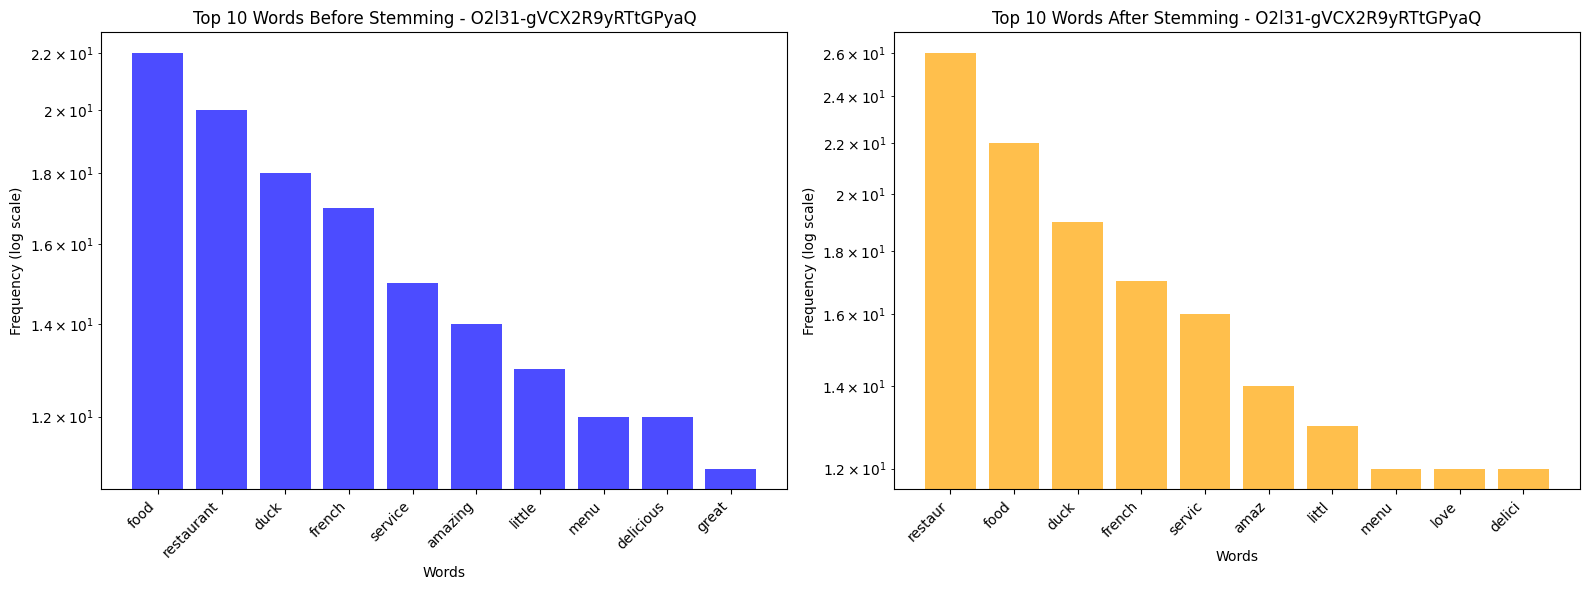

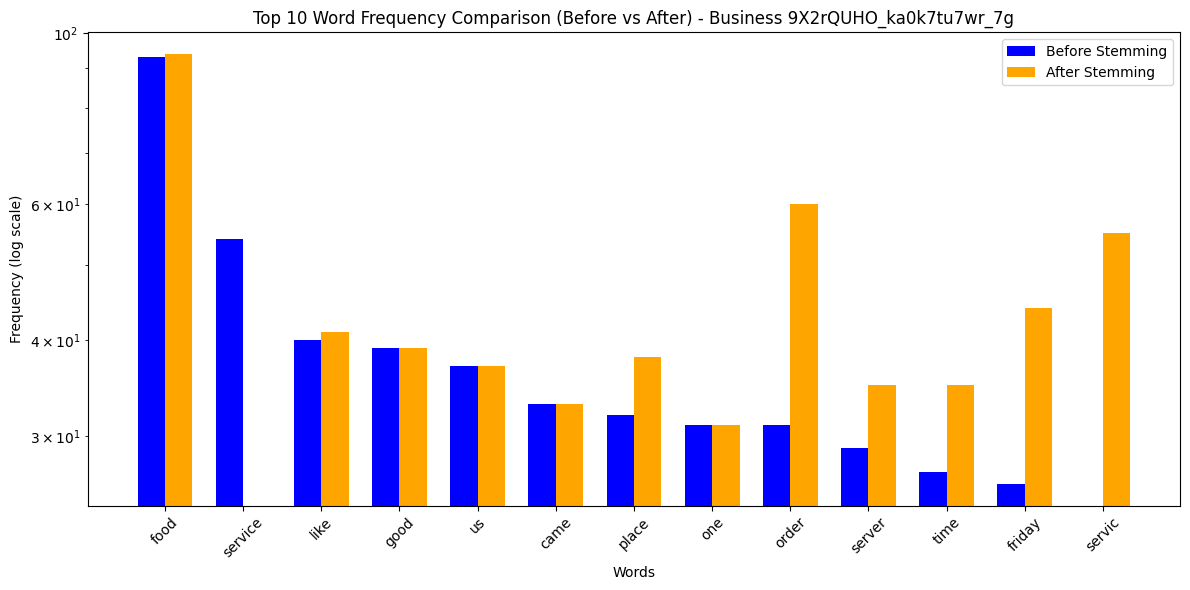

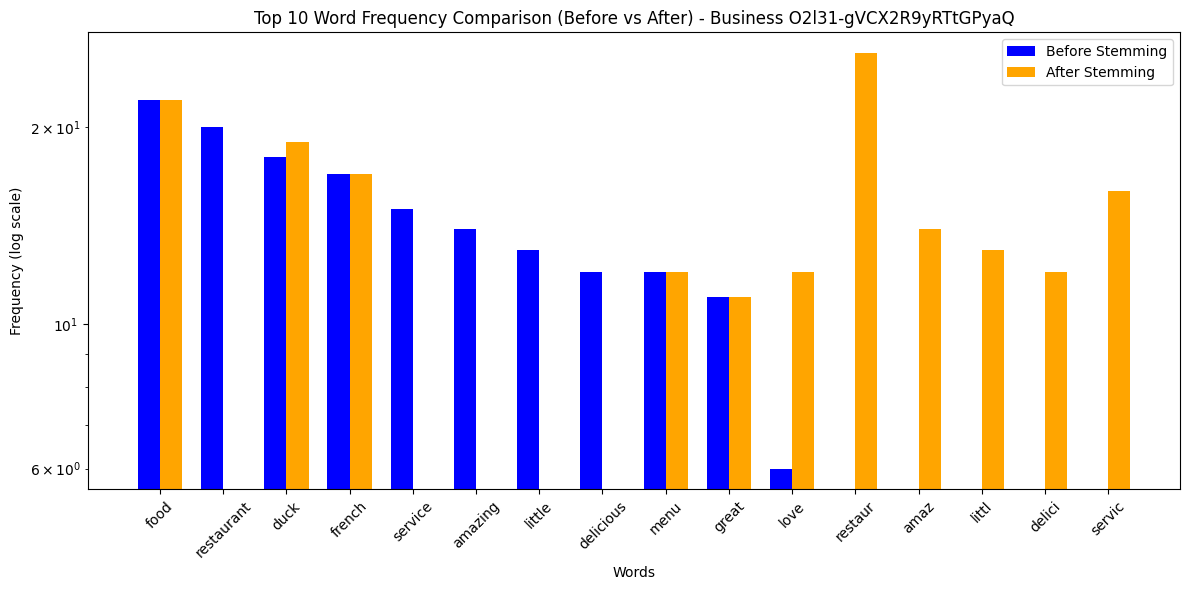

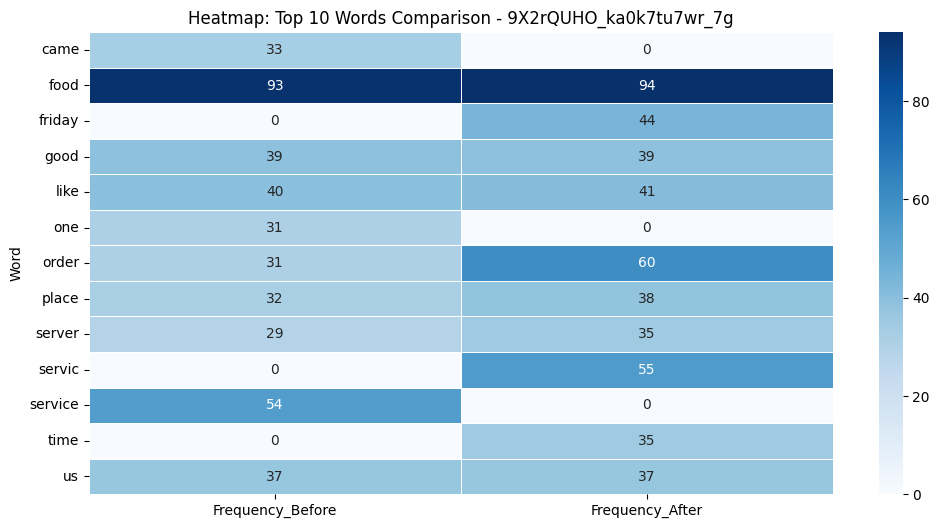

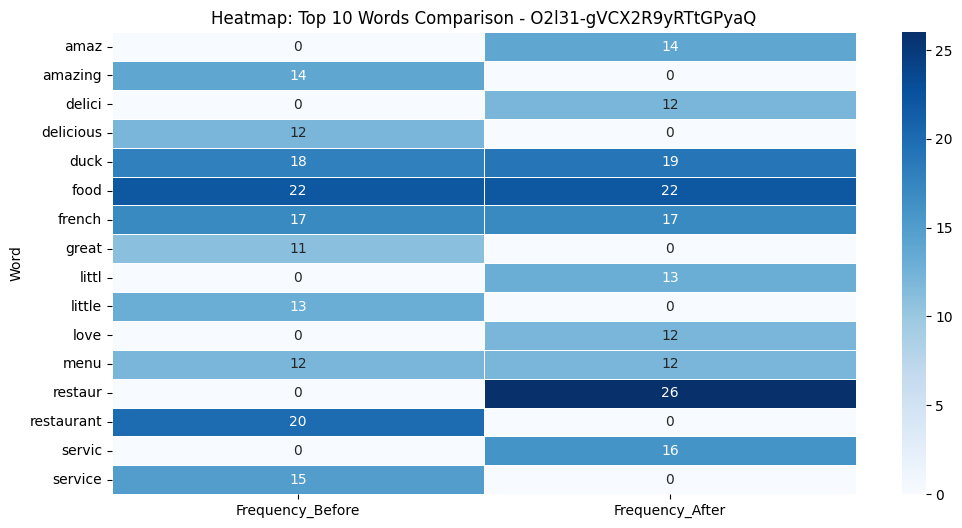

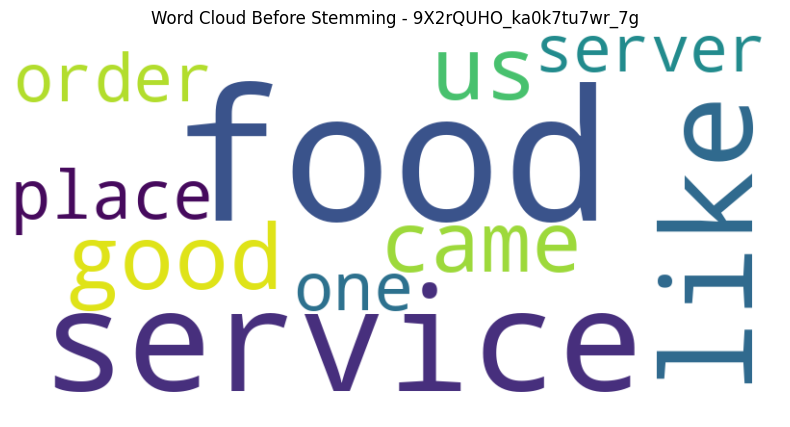

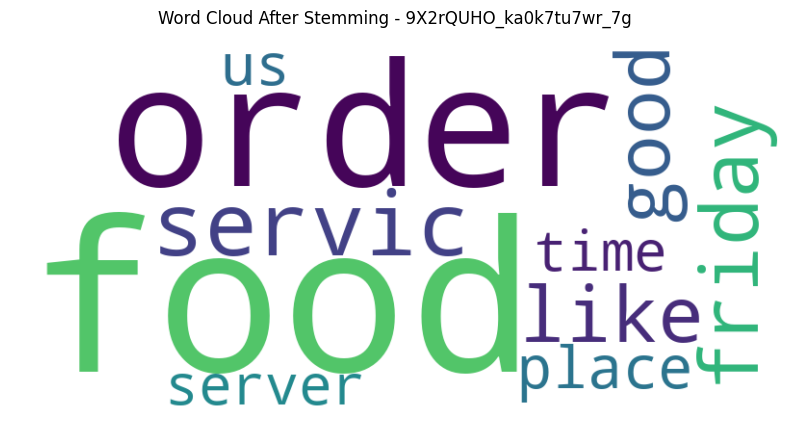

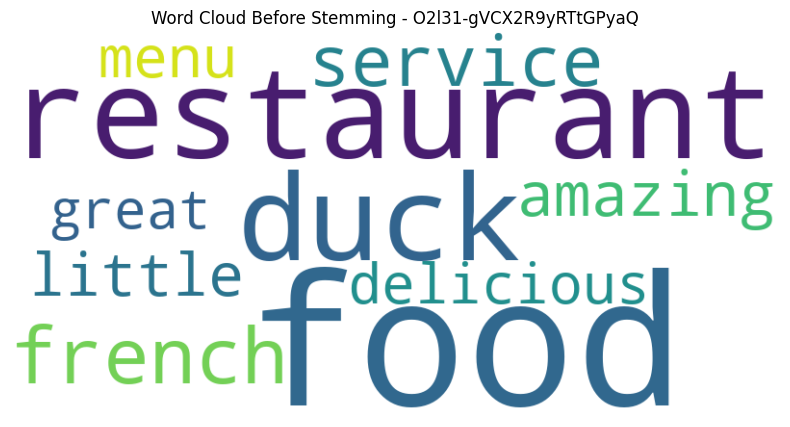

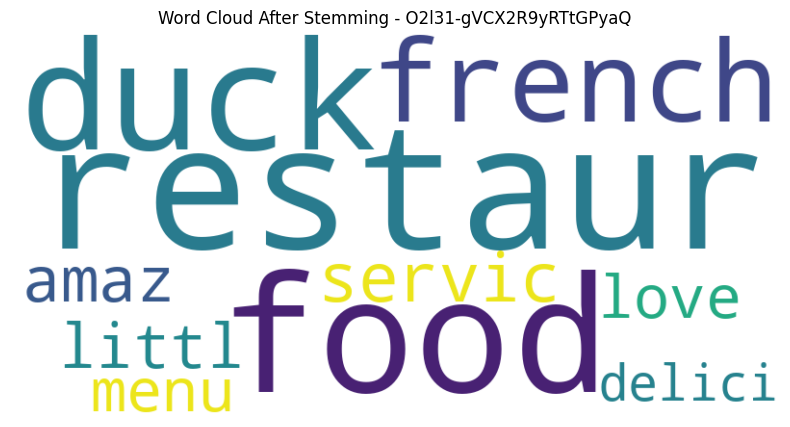

9X2rQUHO_ka0k7tu7wr_7g - Number of words before stemming: 1433
9X2rQUHO_ka0k7tu7wr_7g - Number of words after stemming: 1175


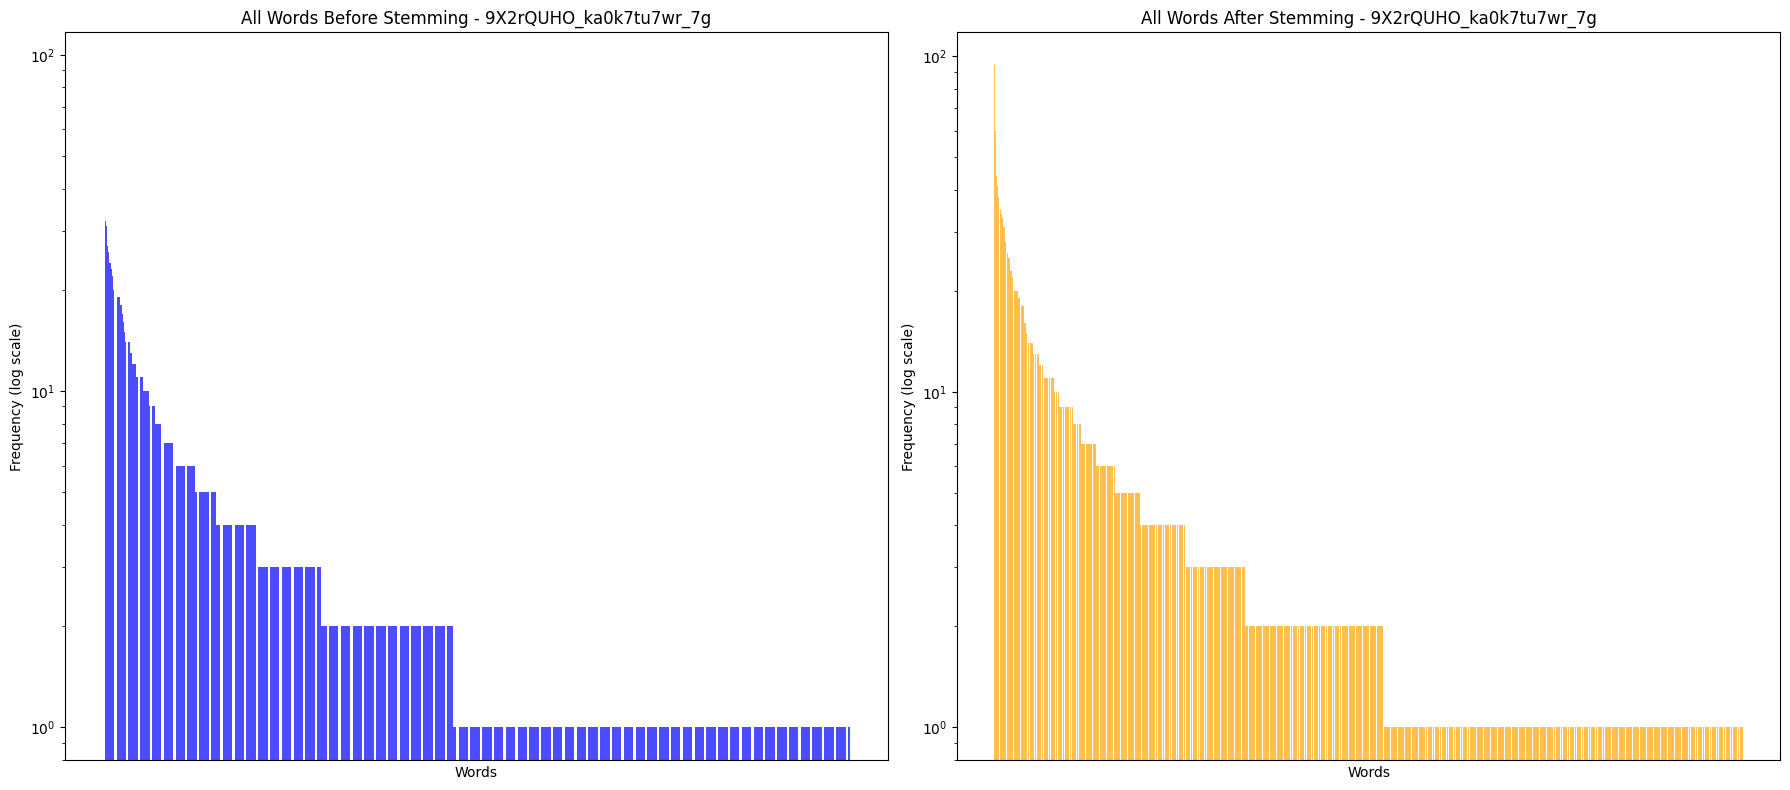

O2l31-gVCX2R9yRTtGPyaQ - Number of words before stemming: 845
O2l31-gVCX2R9yRTtGPyaQ - Number of words after stemming: 743


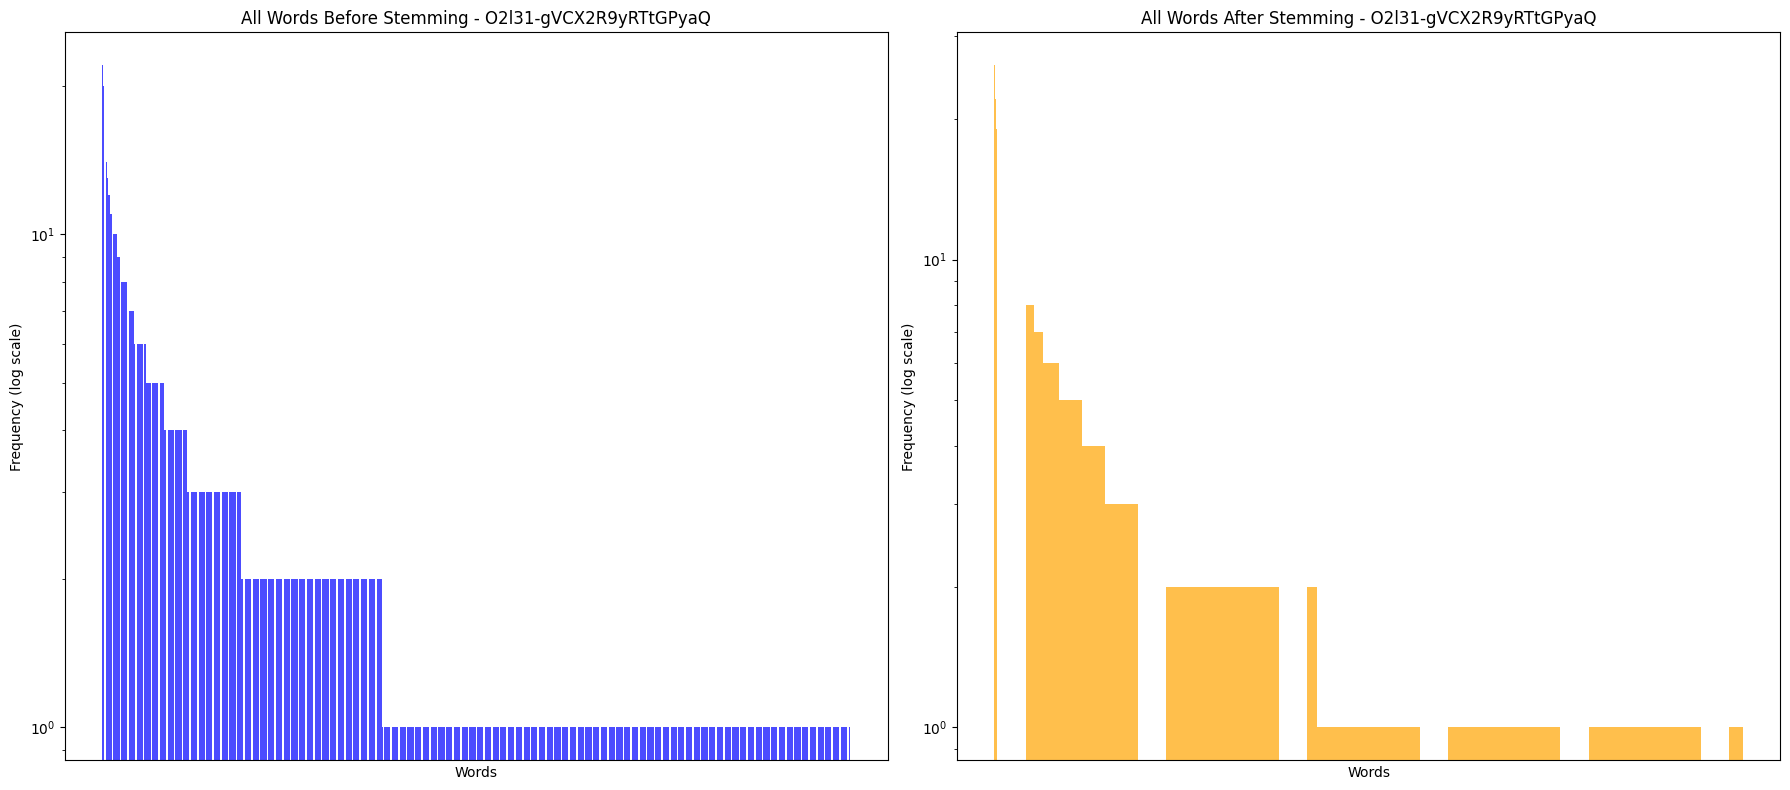

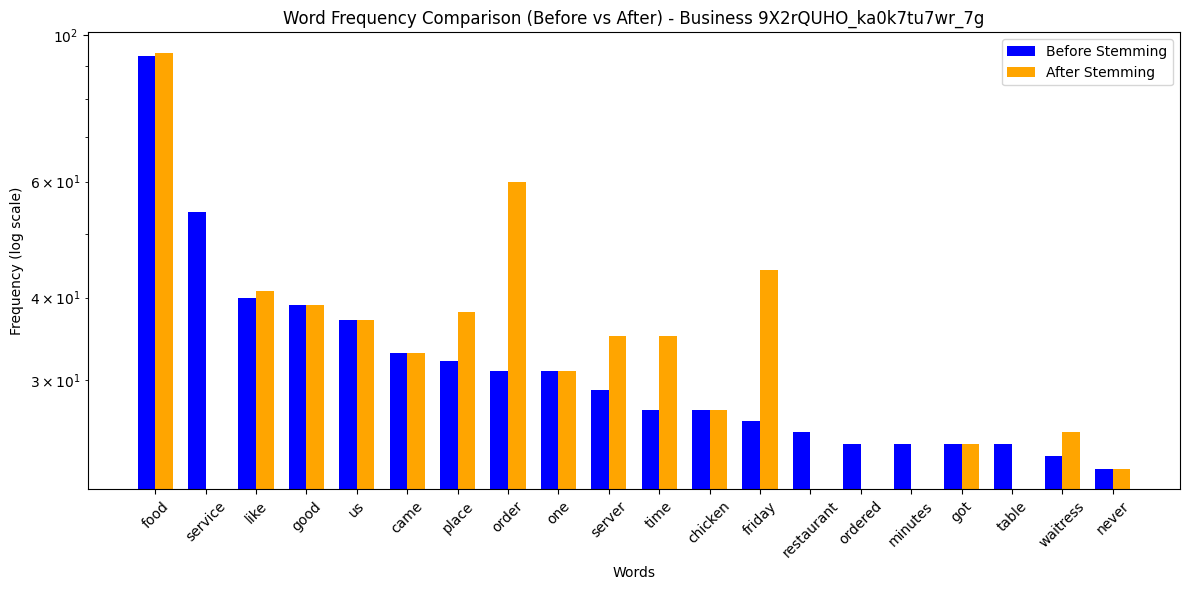

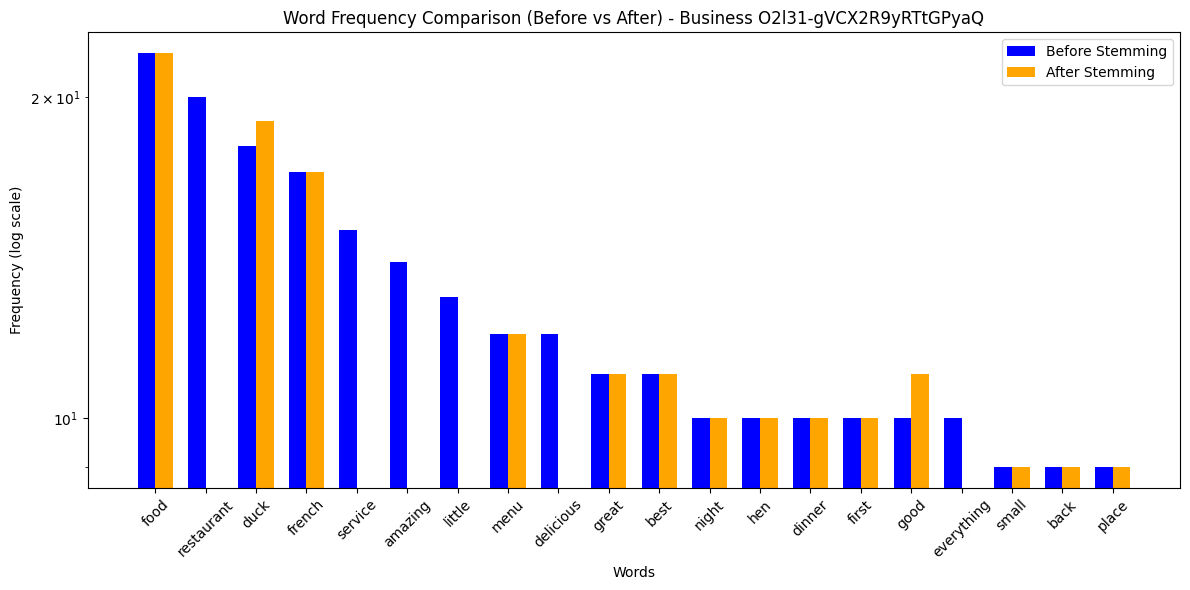

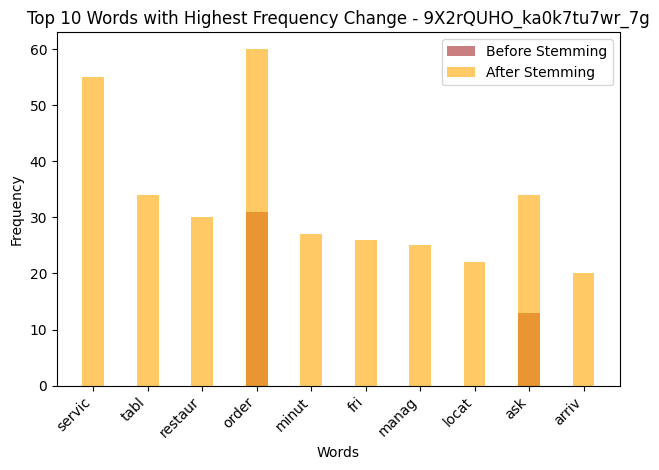

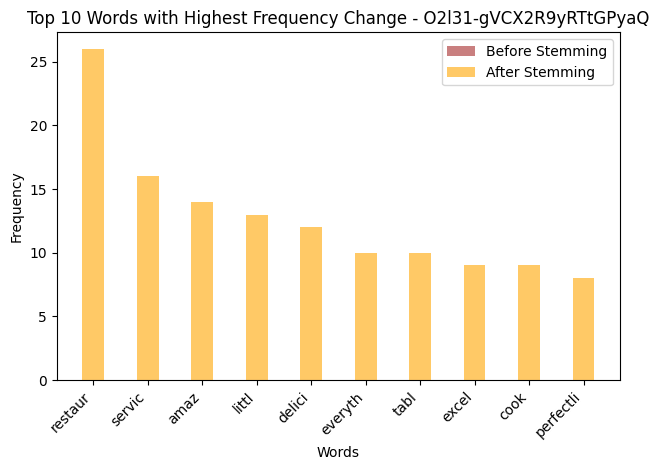

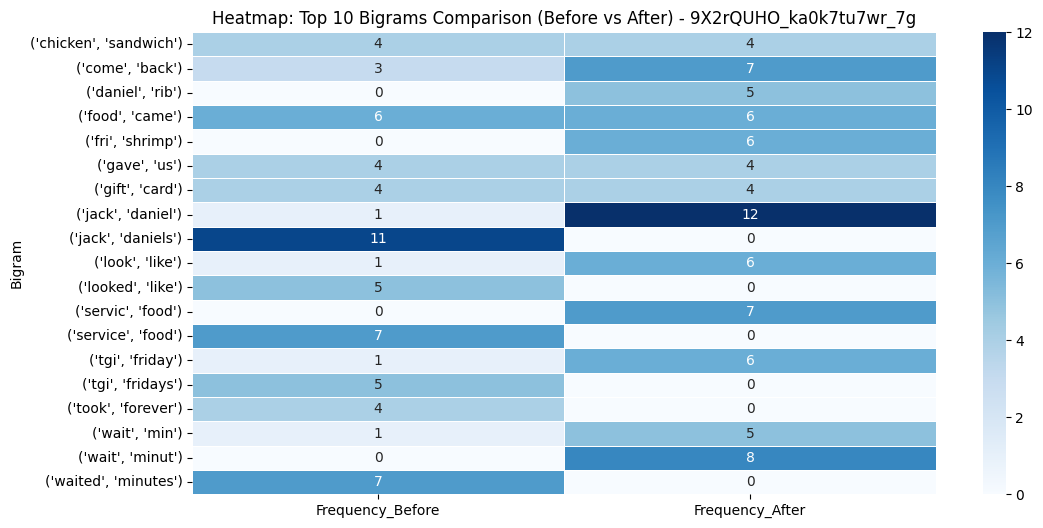

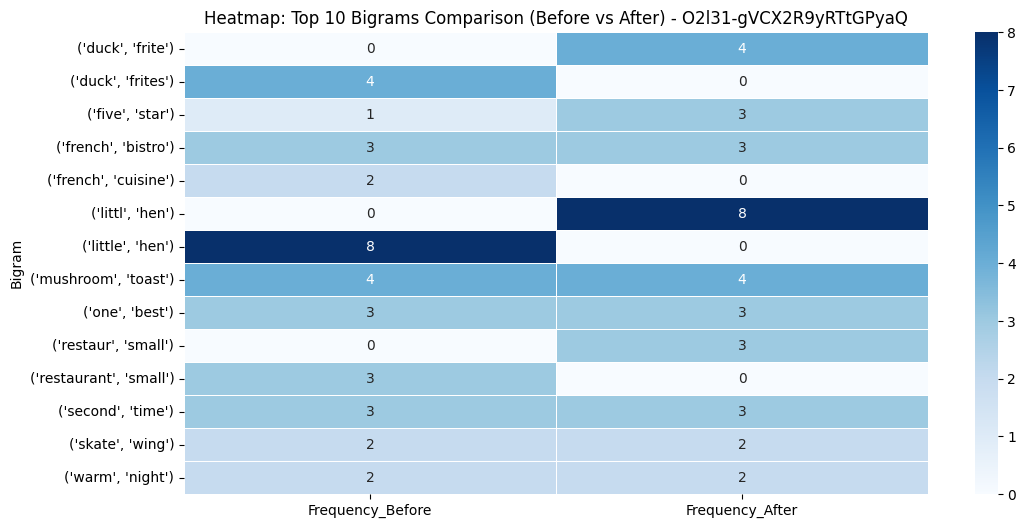

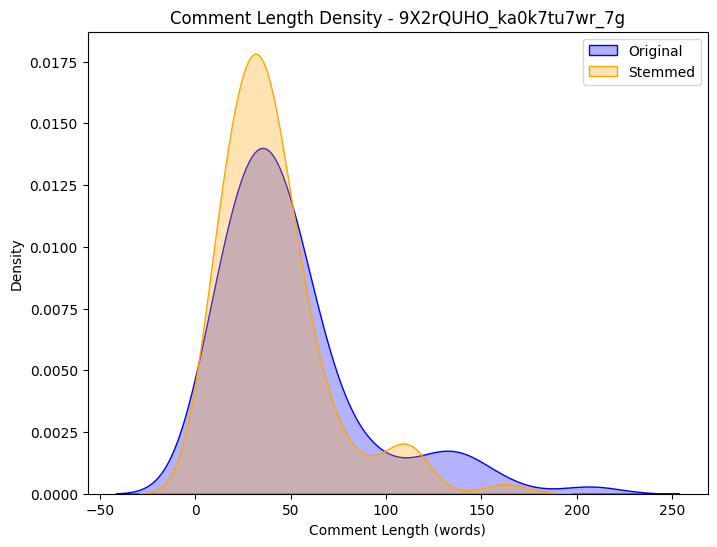

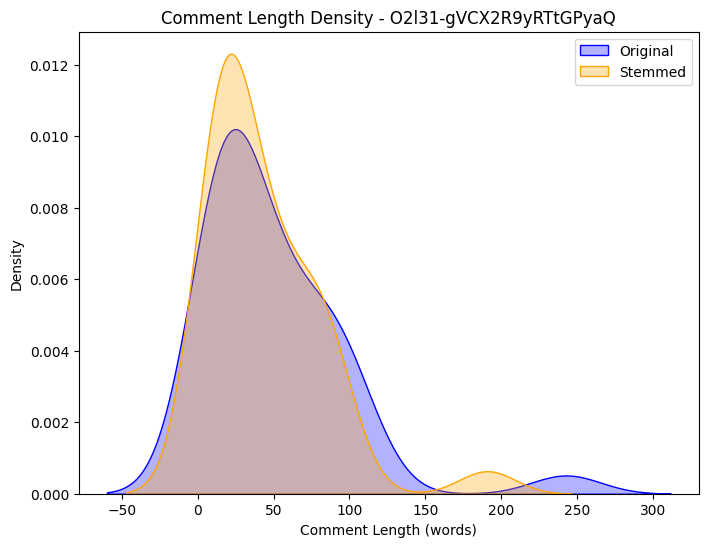

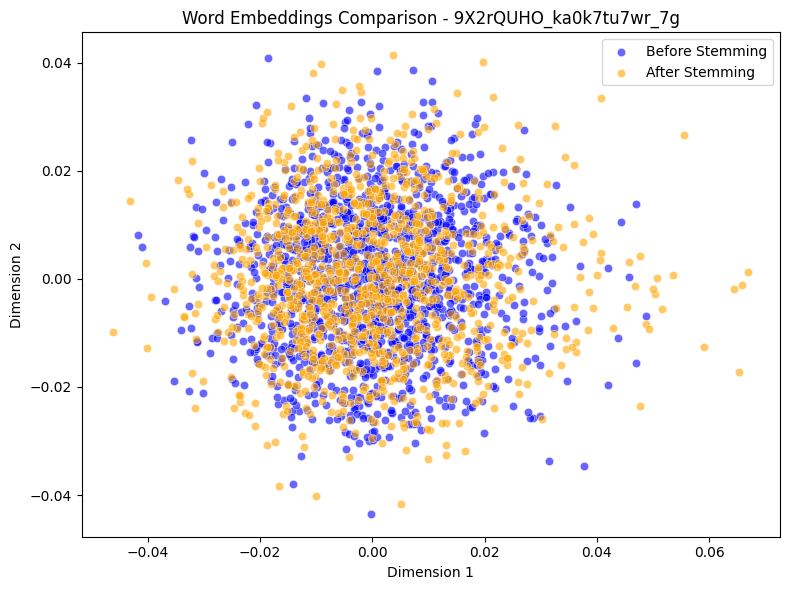

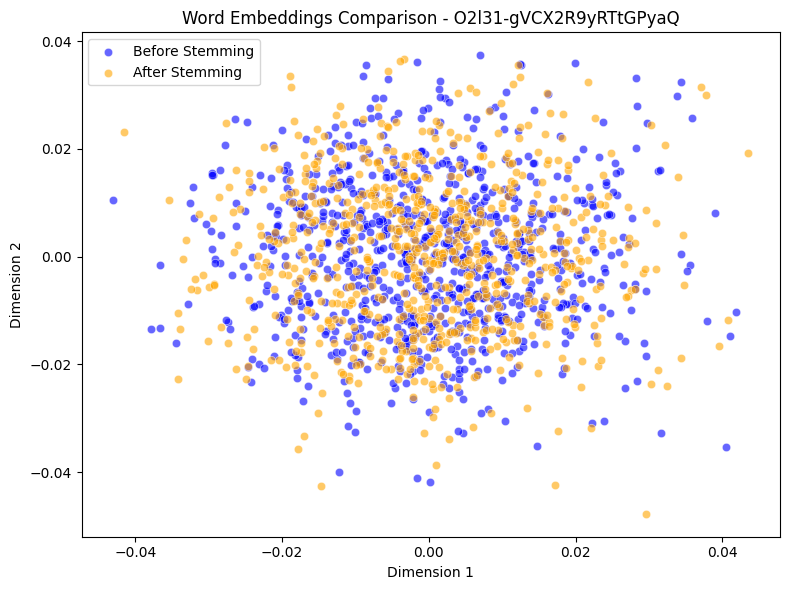

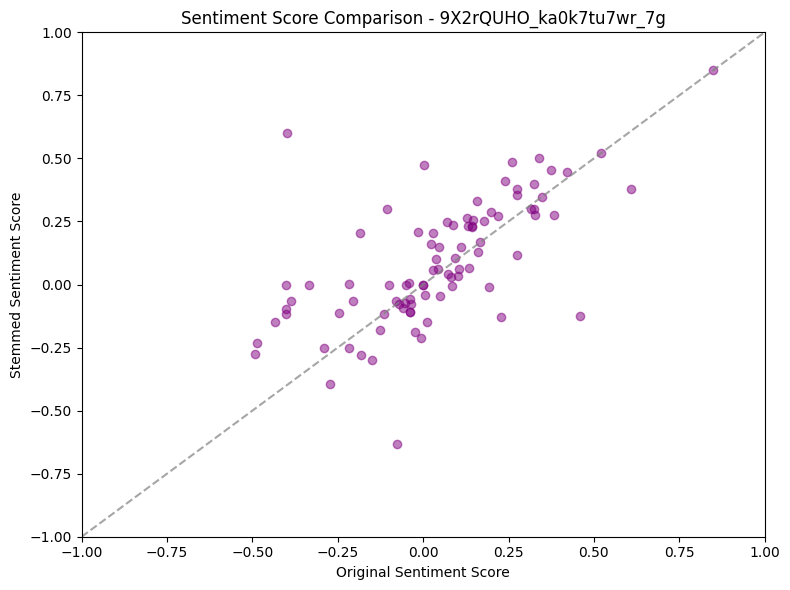

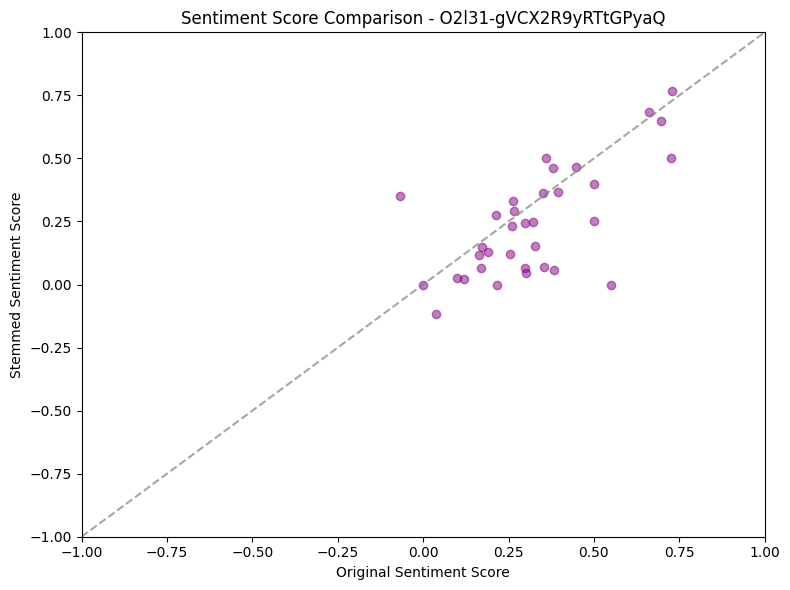

<ipython-input-56-0cfd8e56ef04>:588: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Version', y='Sentiment Score', data=df, palette='Set2')


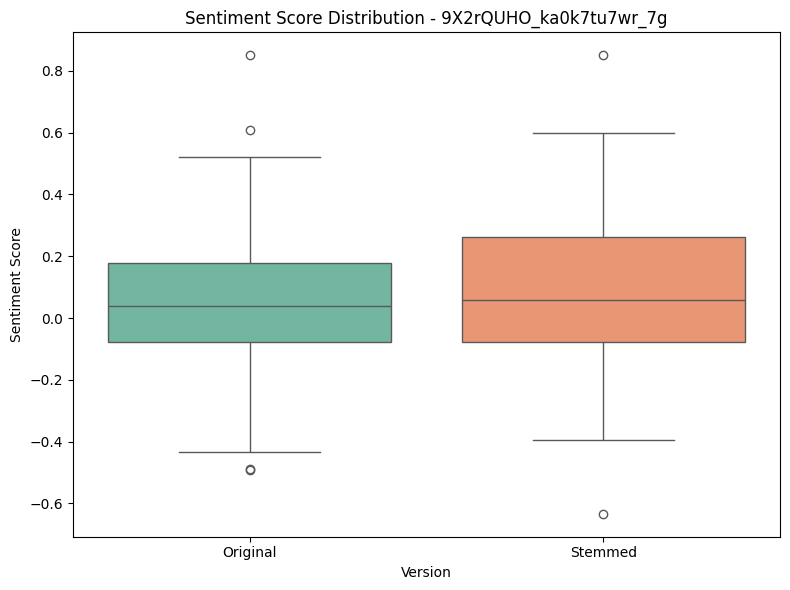

<ipython-input-56-0cfd8e56ef04>:588: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Version', y='Sentiment Score', data=df, palette='Set2')


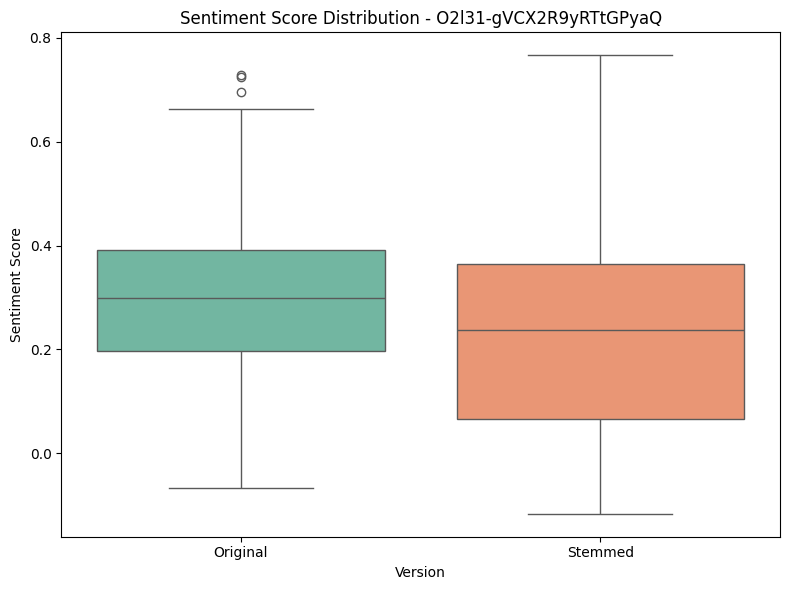

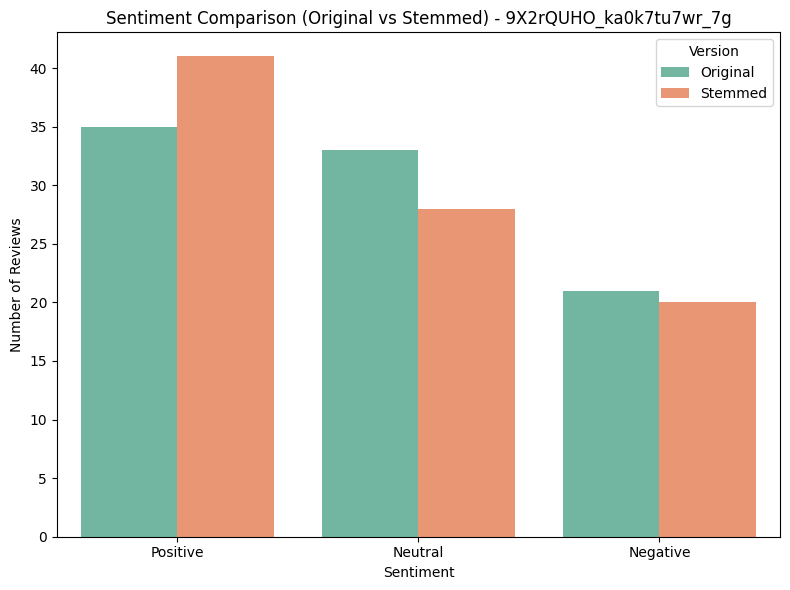

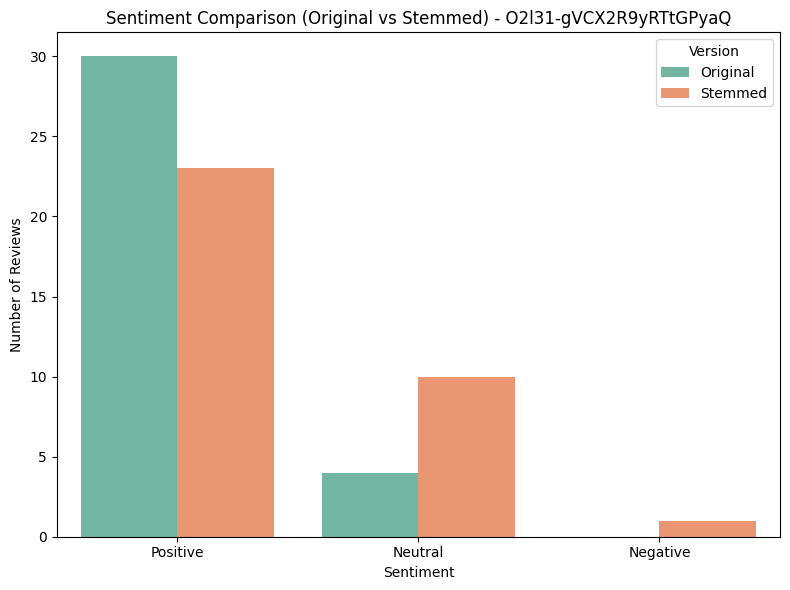

In [ ]:
import random
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
from google.colab import drive
import seaborn as sns

# Download NLTK resources if not available
nltk.download('punkt')
nltk.download('stopwords')

# Mount Google Drive
drive.mount('/content/drive')

# Load the datasets from Google Drive
business_file_path = '/content/drive/MyDrive/nj_business.json'
review_file_path = '/content/drive/MyDrive/nj_reviews.json'

# Load business and review data
nj_business = pd.read_json(business_file_path, orient='records')
nj_reviews = pd.read_json(review_file_path, orient='records')
print("Datasets loaded successfully!")

# Initialize the stemmer and extended stopwords
stemmer = PorterStemmer()
custom_stopwords = {"would", "get", "go", "could", "see", "even", "much", "make", "also"}
stop_words = set(stopwords.words('english')).union(custom_stopwords)

# Fixed Business IDs
selected_business_ids = ['9X2rQUHO_ka0k7tu7wr_7g', 'O2l31-gVCX2R9yRTtGPyaQ']
print(f"Using Fixed Business IDs: {selected_business_ids}")

# Analyze word frequency for a business
def analyze_business_reviews(business_id):
    reviews = nj_reviews[nj_reviews['business_id'] == business_id]
    all_text = " ".join(reviews['text'].tolist())
    tokens = word_tokenize(all_text.lower())
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    word_freq_before = Counter(filtered_tokens)
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    word_freq_after = Counter(stemmed_tokens)
    return word_freq_before, word_freq_after

# Analyze both businesses with fixed IDs
word_freq_b1_before, word_freq_b1_after = analyze_business_reviews(selected_business_ids[0])
word_freq_b2_before, word_freq_b2_after = analyze_business_reviews(selected_business_ids[1])

# Followed by analysis and visualization for each fixed business ID
### 1.1 Bar Chart Comparison (Log Scale)

def plot_word_freq_comparison(business_id, freq_before, freq_after):
    # Prepare data
    df_before = pd.DataFrame(freq_before.most_common(10), columns=['Word', 'Frequency'])
    df_after = pd.DataFrame(freq_after.most_common(10), columns=['Word', 'Frequency'])

    # Create subplots
    plt.figure(figsize=(16, 6))

    # Plot Before Stemming
    plt.subplot(1, 2, 1)
    plt.bar(df_before['Word'], df_before['Frequency'], color='blue', alpha=0.7)
    plt.xticks(rotation=45, ha='right')
    plt.yscale('log')
    plt.title(f'Top 10 Words Before Stemming - {business_id}')
    plt.xlabel('Words')
    plt.ylabel('Frequency (log scale)')

    # Plot After Stemming
    plt.subplot(1, 2, 2)
    plt.bar(df_after['Word'], df_after['Frequency'], color='orange', alpha=0.7)
    plt.xticks(rotation=45, ha='right')
    plt.yscale('log')
    plt.title(f'Top 10 Words After Stemming - {business_id}')
    plt.xlabel('Words')
    plt.ylabel('Frequency (log scale)')

    plt.tight_layout()
    plt.show()

# Plot bar chart comparison for both businesses
plot_word_freq_comparison(selected_business_ids[0], word_freq_b1_before, word_freq_b1_after)
plot_word_freq_comparison(selected_business_ids[1], word_freq_b2_before, word_freq_b2_after)

### 1.2 Top 10 Words Log Scale Comparison with Grouped Bar Chart

import matplotlib.pyplot as plt
import pandas as pd

def plot_top10_comparison(business_id, freq_before, freq_after):
    # Step 1: Get top 10 words based on 'before' stemming frequencies
    df_before = pd.DataFrame(freq_before.most_common(10), columns=['Word', 'Frequency'])
    top_words_before = set(df_before['Word'].tolist())

    # Step 2: Get top 10 words based on 'after' stemming frequencies
    df_after = pd.DataFrame(freq_after.most_common(10), columns=['Word', 'Frequency'])
    top_words_after = set(df_after['Word'].tolist())

    # Step 3: Combine both top word sets to get unique x-axis labels
    combined_words = list(top_words_before | top_words_after)

    # Step 4: Sort combined words based on 'before' stemming frequency (descending)
    combined_words.sort(key=lambda word: freq_before.get(word, 0), reverse=True)

    # Step 5: Prepare frequencies for 'before' and 'after' for each word in combined list
    df_before = pd.DataFrame([(word, freq_before.get(word, 0)) for word in combined_words],
                             columns=['Word', 'Frequency'])
    df_after = pd.DataFrame([(word, freq_after.get(word, 0)) for word in combined_words],
                            columns=['Word', 'Frequency'])

    # Plotting
    plt.figure(figsize=(12, 6))
    bar_width = 0.35

    # Define x-axis positions
    r1 = range(len(combined_words))
    r2 = [x + bar_width for x in r1]

    # Plot 'before' stemming frequencies
    plt.bar(r1, df_before['Frequency'], color='blue', width=bar_width, label='Before Stemming')

    # Plot 'after' stemming frequencies
    plt.bar(r2, df_after['Frequency'], color='orange', width=bar_width, label='After Stemming')

    # Add labels, title, and formatting
    plt.xticks([r + bar_width / 2 for r in range(len(combined_words))], combined_words, rotation=45)
    plt.yscale('log')
    plt.xlabel('Words')
    plt.ylabel('Frequency (log scale)')
    plt.title(f'Top 10 Word Frequency Comparison (Before vs After) - Business {business_id}')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage
plot_top10_comparison(selected_business_ids[0], word_freq_b1_before, word_freq_b1_after)
plot_top10_comparison(selected_business_ids[1], word_freq_b2_before, word_freq_b2_after)

### 1.3 Heatmap Comparison: Top 10 Words Before Stemming
def plot_combined_heatmap_comparison(freq_before, freq_after, business_id):
    # Create DataFrames for top 10 words before and after stemming
    df_before = pd.DataFrame(freq_before.most_common(10), columns=['Word', 'Frequency_Before'])
    df_after = pd.DataFrame(freq_after.most_common(10), columns=['Word', 'Frequency_After'])

    # Merge the two DataFrames on 'Word', filling missing values with 0
    merged_df = pd.merge(df_before, df_after, on='Word', how='outer').fillna(0)
    merged_df.set_index('Word', inplace=True)

    # Plot heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(merged_df, annot=True, cmap='Blues', fmt='.0f', linewidths=0.5)

    # Set the title and show the plot
    plt.title(f'Heatmap: Top 10 Words Comparison - {business_id}')
    plt.show()

# Example usage for a business
plot_combined_heatmap_comparison(word_freq_b1_before, word_freq_b1_after,
                                 selected_business_ids[0])

plot_combined_heatmap_comparison(word_freq_b2_before, word_freq_b2_after,
                                 selected_business_ids[1])

### 1.4 Word Cloud Visualization

def plot_wordcloud(freq, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Plot word clouds for both businesses (before and after stemming)
plot_wordcloud(dict(word_freq_b1_before.most_common(10)),
               f'Word Cloud Before Stemming - {selected_business_ids[0]}')
plot_wordcloud(dict(word_freq_b1_after.most_common(10)),
               f'Word Cloud After Stemming - {selected_business_ids[0]}')

plot_wordcloud(dict(word_freq_b2_before.most_common(10)),
               f'Word Cloud Before Stemming - {selected_business_ids[1]}')
plot_wordcloud(dict(word_freq_b2_after.most_common(10)),
               f'Word Cloud After Stemming - {selected_business_ids[1]}')

### 1.5 Plot All Words Log Scale Distribution

def plot_all_word_freq(business_id, freq_before, freq_after):
    # Convert to DataFrame
    df_before = pd.DataFrame(freq_before.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
    df_after = pd.DataFrame(freq_after.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

    # Calculate and print the number of unique words
    words_before_count = len(df_before)
    words_after_count = len(df_after)
    print(f"{business_id} - Number of words before stemming: {words_before_count}")
    print(f"{business_id} - Number of words after stemming: {words_after_count}")

    # Create subplots
    plt.figure(figsize=(18, 8))

    # Plot Before Stemming
    plt.subplot(1, 2, 1)
    plt.bar(df_before['Word'], df_before['Frequency'], color='blue', alpha=0.7)
    plt.xticks(rotation=90, ha='right')
    plt.yscale('log')
    plt.title(f'All Words Before Stemming - {business_id}')
    plt.xlabel('Words')
    plt.ylabel('Frequency (log scale)')
    plt.gca().set_xticks([])  # Remove x-axis words

    # Plot After Stemming
    plt.subplot(1, 2, 2)
    plt.bar(df_after['Word'], df_after['Frequency'], color='orange', alpha=0.7)
    plt.xticks(rotation=90, ha='right')
    plt.yscale('log')
    plt.title(f'All Words After Stemming - {business_id}')
    plt.xlabel('Words')
    plt.ylabel('Frequency (log scale)')
    plt.gca().set_xticks([])  # Remove x-axis words

    plt.tight_layout()
    plt.show()

# Example usage
plot_all_word_freq(selected_business_ids[0], word_freq_b1_before, word_freq_b1_after)
plot_all_word_freq(selected_business_ids[1], word_freq_b2_before, word_freq_b2_after)


### 1.6 Additional Combined Comparison Plot

def plot_combined_stemming_comparison(business_id, freq_before, freq_after):
    # Ensure both DataFrames have the same 20 words (based on 'before' stemming)
    df_before = pd.DataFrame(freq_before.most_common(20), columns=['Word', 'Frequency'])
    words = df_before['Word'].tolist()  # Use these words as the x-axis

    # Create a DataFrame with 'after' stemming frequencies matching the same words
    df_after = pd.DataFrame([(word, freq_after.get(word, 0)) for word in words],
                            columns=['Word', 'Frequency'])

    # Plot both 'before' and 'after' on the same chart
    plt.figure(figsize=(12, 6))
    bar_width = 0.35  # Width of each bar

    # X-axis positions for 'before' and 'after' bars
    r1 = range(len(df_before))
    r2 = [x + bar_width for x in r1]

    # Plot bars for 'before' stemming
    plt.bar(r1, df_before['Frequency'], color='blue', width=bar_width, label='Before Stemming')

    # Plot bars for 'after' stemming
    plt.bar(r2, df_after['Frequency'], color='orange', width=bar_width, label='After Stemming')

    # Add labels and title
    plt.xticks([r + bar_width / 2 for r in range(len(df_before))], words, rotation=45)
    plt.yscale('log')
    plt.xlabel('Words')
    plt.ylabel('Frequency (log scale)')
    plt.title(f'Word Frequency Comparison (Before vs After) - Business {business_id}')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot combined comparison for both businesses
plot_combined_stemming_comparison(selected_business_ids[0], word_freq_b1_before, word_freq_b1_after)
plot_combined_stemming_comparison(selected_business_ids[1], word_freq_b2_before, word_freq_b2_after)

### 1.7 Identify and Visualize Top 10 Words with Highest Frequency Increase
import seaborn as sns

# Function to calculate frequency change due to stemming
def calculate_frequency_change(freq_before, freq_after):
    # Combine both dictionaries into a single DataFrame for easier comparison
    before_df = pd.DataFrame(freq_before.items(), columns=['Word', 'Frequency_Before'])
    after_df = pd.DataFrame(freq_after.items(), columns=['Word', 'Frequency_After'])

    # Merge on the word column to align frequencies
    merged_df = pd.merge(before_df, after_df, on='Word', how='outer').fillna(0)

    # Calculate frequency change
    merged_df['Frequency_Change'] = merged_df['Frequency_After'] - merged_df['Frequency_Before']

    # Sort by frequency change in descending order
    merged_df = merged_df.sort_values(by='Frequency_Change', ascending=False)

    # Return the top 10 words with the largest frequency increase
    return merged_df.head(10)

# Analyze the frequency increase for both businesses
top_changes_b1 = calculate_frequency_change(word_freq_b1_before, word_freq_b1_after)
top_changes_b2 = calculate_frequency_change(word_freq_b2_before, word_freq_b2_after)

#Overlapping Bar Chart: Frequency Comparison Visualization
def plot_overlapping_frequency_change(merged_df, business_id):
    # Prepare data for plotting
    x = range(len(merged_df))  # X-axis positions
    width = 0.4  # Width of the bars

    # Plot "Frequency Before" bars
    plt.bar(x, merged_df['Frequency_Before'], width=width, label='Before Stemming',
            color='brown', alpha=0.6)

    # Plot "Frequency After" bars (slightly offset for overlap)
    plt.bar(x, merged_df['Frequency_After'], width=width, label='After Stemming',
            color='orange', alpha=0.6)

    # Set x-axis with word labels
    plt.xticks(x, merged_df['Word'], rotation=45, ha='right')

    # Add title and labels
    plt.title(f'Top 10 Words with Highest Frequency Change - {business_id}')
    plt.ylabel('Frequency')
    plt.xlabel('Words')

    # Display legend
    plt.legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Plot overlapping bar charts for both businesses
plot_overlapping_frequency_change(top_changes_b1, selected_business_ids[0])
plot_overlapping_frequency_change(top_changes_b2, selected_business_ids[1])

### Step 2: N-gram Analysis
from nltk import bigrams
from collections import Counter
# Function to preprocess and optionally stem text
# Function to preprocess and optionally stem text
def preprocess_text(text, stem=False):
    words = [word for word in text.lower().split() if word.isalpha() and word not in stop_words]
    if stem:
        words = [stemmer.stem(word) for word in words]
    return words

# Calculate bigram frequencies
def get_bigram_freq(reviews, stem=False):
    bigram_list = []
    for review in reviews:
        processed_words = preprocess_text(review, stem=stem)
        bigram_list.extend(bigrams(processed_words))
    return Counter(bigram_list)

# Function to plot heatmap comparison for top 10 bigrams
def plot_combined_heatmap_comparison(bigram_freq_before, bigram_freq_after, business_id):
    # Get the top 10 bigrams from both 'before' and 'after' stemming
    top_bigrams_before = [bigram for bigram, _ in bigram_freq_before.most_common(10)]
    top_bigrams_after = [bigram for bigram, _ in bigram_freq_after.most_common(10)]

    # Combine them to get unique bigrams for x-axis
    all_bigrams = list(dict.fromkeys(top_bigrams_before + top_bigrams_after))  # Maintain order and remove duplicates

    # Create DataFrames for the top bigrams before and after stemming
    df_before = pd.DataFrame([(bigram, bigram_freq_before.get(bigram, 0)) for bigram in all_bigrams],
                             columns=['Bigram', 'Frequency_Before'])
    df_after = pd.DataFrame([(bigram, bigram_freq_after.get(bigram, 0)) for bigram in all_bigrams],
                            columns=['Bigram', 'Frequency_After'])

    # Merge the two DataFrames on 'Bigram', filling missing values with 0
    merged_df = pd.merge(df_before, df_after, on='Bigram', how='outer').fillna(0)
    merged_df.set_index('Bigram', inplace=True)

    # Plot heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(merged_df, annot=True, cmap='Blues', fmt='.0f', linewidths=0.5)

    # Set the title and show the plot
    plt.title(f'Heatmap: Top 10 Bigrams Comparison (Before vs After) - {business_id}')
    plt.show()

# Analyze and plot for each selected business
for business_id in selected_business_ids:
    # Filter reviews for this business
    reviews = nj_reviews[nj_reviews['business_id'] == business_id]['text'].tolist()

    # Calculate bigram frequencies before and after stemming
    bigram_freq_before = get_bigram_freq(reviews, stem=False)
    bigram_freq_after = get_bigram_freq(reviews, stem=True)

    # Plot bigram comparison heatmap for this business
    plot_combined_heatmap_comparison(bigram_freq_before, bigram_freq_after, business_id)

### Step 3: Comment Length Distribution Analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate comment lengths (before and after stemming)
def calculate_comment_lengths(business_id):
    reviews = nj_reviews[nj_reviews['business_id'] == business_id]

    # Store lengths for original and stemmed versions
    original_lengths = []
    stemmed_lengths = []

    for review in reviews['text']:
        # Tokenize and filter stopwords
        tokens = word_tokenize(review.lower())
        filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

        # Original length: without stemming, just filtered tokens
        original_lengths.append(len(filtered_tokens))

        # Stemmed tokens with duplicates removed (to reflect merging of word forms)
        stemmed_tokens = set([stemmer.stem(word) for word in filtered_tokens])
        stemmed_lengths.append(len(stemmed_tokens))

    return original_lengths, stemmed_lengths

# Calculate comment lengths for both businesses
lengths_b1 = calculate_comment_lengths(selected_business_ids[0])
lengths_b2 = calculate_comment_lengths(selected_business_ids[1])

### 3.1 Density Plot: Length Trend Comparison

def plot_density_comparison(lengths, business_id):
    original_lengths, stemmed_lengths = lengths

    plt.figure(figsize=(8, 6))

    sns.kdeplot(original_lengths, label='Original', color='blue', fill=True, alpha=0.3)
    sns.kdeplot(stemmed_lengths, label='Stemmed', color='orange', fill=True, alpha=0.3)

    plt.title(f'Comment Length Density - {business_id}')
    plt.xlabel('Comment Length (words)')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Plot density comparison for both businesses
plot_density_comparison(lengths_b1, selected_business_ids[0])
plot_density_comparison(lengths_b2, selected_business_ids[1])

### Step 4: Word Embedding Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Function to train the Word2Vec model
def train_word2vec(tokens_list):
    model = Word2Vec(sentences=tokens_list, vector_size=50, window=5, min_count=1, sg=0)
    return model

# Prepare data: Extract tokens from business reviews
def prepare_tokenized_reviews(business_id):
    reviews = nj_reviews[nj_reviews['business_id'] == business_id]
    tokens_list = []

    for review in reviews['text']:
        # Tokenize and remove stop words
        tokens = word_tokenize(review.lower())
        filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
        tokens_list.append(filtered_tokens)

    return tokens_list

# Train Word2Vec models for two businesses
tokens_b1 = prepare_tokenized_reviews(selected_business_ids[0])
tokens_b2 = prepare_tokenized_reviews(selected_business_ids[1])

# Train embeddings for before and after stemming
model_b1_before = train_word2vec(tokens_b1)
model_b1_after = train_word2vec([[stemmer.stem(word) for word in tokens] for tokens in tokens_b1])

model_b2_before = train_word2vec(tokens_b2)
model_b2_after = train_word2vec([[stemmer.stem(word) for word in tokens] for tokens in tokens_b2])

### Dimensionality reduction using PCA or t-SNE
def reduce_dimensions(model, method='pca'):
    words = list(model.wv.index_to_key)  # Get the vocabulary
    vectors = model.wv[words]  # Retrieve corresponding word vectors

    if method == 'pca':
        reducer = PCA(n_components=2)
    else:
        reducer = TSNE(n_components=2, random_state=42)

    reduced_vectors = reducer.fit_transform(vectors)
    return pd.DataFrame(reduced_vectors, index=words, columns=['x', 'y'])

# Dimensionality reduction: Compute embeddings for four models
reduced_b1_before = reduce_dimensions(model_b1_before)
reduced_b1_after = reduce_dimensions(model_b1_after)

reduced_b2_before = reduce_dimensions(model_b2_before)
reduced_b2_after = reduce_dimensions(model_b2_after)

### Visualize the word embeddings for both businesses
def plot_combined_embeddings(reduced_vectors_before, reduced_vectors_after, business_id):
    plt.figure(figsize=(8, 6))

    # Plot word embeddings before stemming (blue)
    sns.scatterplot(x='x', y='y', data=reduced_vectors_before, alpha=0.6, color='blue', label='Before Stemming')

    # Plot word embeddings after stemming (orange)
    sns.scatterplot(x='x', y='y', data=reduced_vectors_after, alpha=0.6, color='orange', label='After Stemming')

    # Set title and axis labels
    plt.title(f'Word Embeddings Comparison - {business_id}')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')

    # Add legend
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()

# Plot word embedding comparison for both businesses
plot_combined_embeddings(reduced_b1_before, reduced_b1_after, selected_business_ids[0])
plot_combined_embeddings(reduced_b2_before, reduced_b2_after, selected_business_ids[1])



### Step 5: Sentiment Analysis
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate sentiment score for each review
def calculate_sentiment_scores(business_id):
    reviews = nj_reviews[nj_reviews['business_id'] == business_id]

    original_scores = []
    stemmed_scores = []

    for review in reviews['text']:
        # Original sentiment score using TextBlob
        original_score = TextBlob(review).sentiment.polarity
        original_scores.append(original_score)

        # Stemmed version sentiment score
        tokens = word_tokenize(review.lower())
        stemmed_tokens = [stemmer.stem(word) for word in tokens if word.isalpha() and word not in stop_words]
        stemmed_review = " ".join(stemmed_tokens)
        stemmed_score = TextBlob(stemmed_review).sentiment.polarity
        stemmed_scores.append(stemmed_score)

    return original_scores, stemmed_scores

# Calculate sentiment scores for both businesses
sentiment_b1 = calculate_sentiment_scores(selected_business_ids[0])
sentiment_b2 = calculate_sentiment_scores(selected_business_ids[1])

### 5.1 Scatter Plot: Sentiment Score Comparison (Before vs After Stemming)

def plot_sentiment_scatter(sentiment, business_id):
    original_scores, stemmed_scores = sentiment

    plt.figure(figsize=(8, 6))
    plt.scatter(original_scores, stemmed_scores, alpha=0.5, color='purple')
    plt.plot([-1, 1], [-1, 1], linestyle='--', color='gray', alpha=0.7)  # Diagonal reference line
    plt.title(f'Sentiment Score Comparison - {business_id}')
    plt.xlabel('Original Sentiment Score')
    plt.ylabel('Stemmed Sentiment Score')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.tight_layout()
    plt.show()

# Plot sentiment scatter plots for both businesses
plot_sentiment_scatter(sentiment_b1, selected_business_ids[0])
plot_sentiment_scatter(sentiment_b2, selected_business_ids[1])

### 5.2 Box Plot: Sentiment Score Distribution

def plot_sentiment_boxplot(sentiment, business_id):
    original_scores, stemmed_scores = sentiment

    # Prepare DataFrame for seaborn boxplot
    df = pd.DataFrame({
        'Sentiment Score': original_scores + stemmed_scores,
        'Version': ['Original'] * len(original_scores) + ['Stemmed'] * len(stemmed_scores)
    })

    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Version', y='Sentiment Score', data=df, palette='Set2')
    plt.title(f'Sentiment Score Distribution - {business_id}')
    plt.xlabel('Version')
    plt.ylabel('Sentiment Score')
    plt.tight_layout()
    plt.show()

# Plot sentiment boxplots for both businesses
plot_sentiment_boxplot(sentiment_b1, selected_business_ids[0])
plot_sentiment_boxplot(sentiment_b2, selected_business_ids[1])

### 5.3 Sentiment Polarity Distribution
# Function to classify sentiment with custom thresholds
def classify_sentiment(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Function to calculate sentiment counts for a business
def calculate_sentiment_counts(business_id):
    reviews = nj_reviews[nj_reviews['business_id'] == business_id]

    # Store sentiment counts for original and stemmed versions
    original_sentiment = {'Positive': 0, 'Neutral': 0, 'Negative': 0}
    stemmed_sentiment = {'Positive': 0, 'Neutral': 0, 'Negative': 0}

    for review in reviews['text']:
        # Original sentiment classification
        original_score = TextBlob(review).sentiment.polarity
        original_label = classify_sentiment(original_score)
        original_sentiment[original_label] += 1

        # Stemmed version sentiment classification
        tokens = word_tokenize(review.lower())
        stemmed_tokens = [stemmer.stem(word) for word in tokens if word.isalpha() and word not in stop_words]
        stemmed_review = " ".join(stemmed_tokens)
        stemmed_score = TextBlob(stemmed_review).sentiment.polarity
        stemmed_label = classify_sentiment(stemmed_score)
        stemmed_sentiment[stemmed_label] += 1

    return original_sentiment, stemmed_sentiment

# Calculate sentiment counts for both businesses
sentiment_counts_b1 = calculate_sentiment_counts(selected_business_ids[0])
sentiment_counts_b2 = calculate_sentiment_counts(selected_business_ids[1])

### Visualization: Compare Sentiment Counts Before and After Stemming on a Single Chart

def plot_sentiment_comparison_single_chart(sentiment_counts, business_id):
    original_sentiment, stemmed_sentiment = sentiment_counts

    # Prepare DataFrame for visualization
    df = pd.DataFrame({
        'Sentiment': list(original_sentiment.keys()),
        'Original': list(original_sentiment.values()),
        'Stemmed': list(stemmed_sentiment.values())
    })

    # Melt the DataFrame to long format for seaborn
    df_melted = df.melt(id_vars='Sentiment', var_name='Version', value_name='Count')

    # Plot the comparison on a single chart
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Sentiment', y='Count', hue='Version', data=df_melted, palette='Set2')
    plt.title(f'Sentiment Comparison (Original vs Stemmed) - {business_id}')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Reviews')
    plt.legend(title='Version', loc='upper right')
    plt.tight_layout()
    plt.show()

# Plot sentiment comparison for both businesses
plot_sentiment_comparison_single_chart(sentiment_counts_b1, selected_business_ids[0])
plot_sentiment_comparison_single_chart(sentiment_counts_b2, selected_business_ids[1])

#Writing Style


In [ ]:
!pip install pdfplumber
!pip install pdfplumber
!pip install textblob
!pip install textstat

import nltk
nltk.download('punkt')  # Download NLTK's punkt package for tokenization
nltk.download('flesch_kincaid')  # Readability test

# Mount Google Drive and install dependencies
from google.colab import drive
drive.mount('/content/drive')
import os
import pdfplumber
import spacy
from nltk.tokenize import word_tokenize, sent_tokenize
from textblob import TextBlob
from nltk.corpus import cmudict
import textstat

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading flesch_kincaid: Package 'flesch_kincaid' not
[nltk_data]     found in index


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Define the folder path and file names
folder_path = '/content/drive/MyDrive/'
file_names = [
    'stackoverflow1.txt', 'stackoverflow2.txt',
    'reddit1.txt', 'reddit2.txt',
    'straitstimes1.txt', 'straitstimes2.txt',
    'patent1.pdf', 'patent2.pdf'
]

# Read files and store their contents
texts = {}
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    if file_name.endswith('.pdf'):
        # Use pdfplumber to read PDF file contents
        with pdfplumber.open(file_path) as pdf:
            pdf_text = ""
            for page in pdf.pages:
                pdf_text += page.extract_text() + "\n"
            texts[file_name] = pdf_text
    else:
        # Read TXT file contents
        with open(file_path, 'r', encoding='utf-8') as file:
            texts[file_name] = file.read()

# Analyze text content
for file_name, text in texts.items():
    print(f"\n{'='*50}\nAnalyzing: {file_name}\n{'='*50}\n")

    # Perform natural language processing using spaCy and NLTK
    doc = nlp(text)
    sentences = list(doc.sents)
    words = word_tokenize(text)

    # 1. Sentence and word complexity analysis (information density)
    avg_sentence_length = sum(len(sent) for sent in sentences) / len(sentences)
    unique_words_ratio = len(set(words)) / len(words)
    fk_score = textstat.flesch_kincaid_grade(text)  # Calculate Flesch-Kincaid score using textstat library

    print("Complexity and Readability:")
    print(f"- Number of sentences      : {len(sentences)}")
    print(f"- Number of words          : {len(words)}")
    print(f"- Average sentence length  : {avg_sentence_length:.2f} words")
    print(f"- Unique words ratio       : {unique_words_ratio:.2f}")
    print(f"- Flesch-Kincaid score     : {fk_score:.2f}")

    # 2. Structural analysis (bullets, code blocks, etc.)
    bullet_points = text.count('- ') + text.count('* ')  # Count bullet points
    code_blocks = text.count('```')  # Code block markers
    numbered_items = sum(1 for word in words if word.isdigit())  # Simple count of numbered items
    print("\nStructural Elements:")
    print(f"- Bullet points            : {bullet_points}")
    print(f"- Code blocks              : {code_blocks}")
    print(f"- Numbered items           : {numbered_items}")

    # 3. Sentiment analysis (emotional neutrality)
    blob = TextBlob(text)
    sentiment = blob.sentiment
    print("\nSentiment Analysis:")
    print(f"- Polarity (emotion)       : {sentiment.polarity:.2f} (range -1 to 1)")
    print(f"- Subjectivity             : {sentiment.subjectivity:.2f} (range 0 to 1)")

    # 4. Uppercase word analysis (proper nouns, etc.)
    uppercase_words = [word for word in words if word.isupper()]
    uppercase_ratio = len(uppercase_words) / len(words)
    print("\nUppercase Words Analysis:")
    print(f"- Uppercase words count    : {len(uppercase_words)}")
    print(f"- Uppercase words ratio    : {uppercase_ratio:.2f}")

    # Display the first two sentences as samples
    sample_sentences = [str(sent) for sent in sentences[:2]]
    print("\nSample Sentences:")
    print("- " + "\n- ".join(sample_sentences))

    print("\n" + "="*50 + "\n")


Analyzing: stackoverflow1.txt

Complexity and Readability:
- Number of sentences      : 28
- Number of words          : 680
- Average sentence length  : 25.64 words
- Unique words ratio       : 0.46
- Flesch-Kincaid score     : 12.60

Structural Elements:
- Bullet points            : 0
- Code blocks              : 0
- Numbered items           : 0

Sentiment Analysis:
- Polarity (emotion)       : 0.20 (range -1 to 1)
- Subjectivity             : 0.41 (range 0 to 1)

Uppercase Words Analysis:
- Uppercase words count    : 21
- Uppercase words ratio    : 0.03

Sample Sentences:
- Enterprise 2024.7:
- Empower your subject matter experts to contribute
This release introduces Subject Matter Expert (SME) Auto-Assign to the Stack Overflow for Teams experience so expert knowledge is automatically captured, verified, and distributed to users.




Analyzing: stackoverflow2.txt

Complexity and Readability:
- Number of sentences      : 68
- Number of words          : 1740
- Average sentence length 